# Game Revenue Analytics

Objective:  

*   Explore the Steam dataset and find insights that can help guide investment decisions.
*   Analyze different attributes such as platform compatibility, monetization methods, geographic markets, and other pertinent factors that might impact investment decisions.



## Necessary Imports and Installations

In [ ]:
# imports
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import math
from datetime import datetime
from dateutil import parser
import ast
from sklearn.preprocessing import StandardScaler

Link to dataset: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download

The dataset has been directly downloaded from Kaggle by creating a new API token and uploading the kaggle.json to the notebook. Therefore to run this notebook, the developer needs to simply upload their respective kaggle.json files

Reference: https://www.kaggle.com/discussions/general/156610

In [ ]:
# installations
!ls -lha kaggle.json
!pip install -q kaggle
!kaggle datasets download -d fronkongames/steam-games-dataset --force
!unzip steam-games-dataset.zip

-rw-r--r-- 1 root root 67 Jul 30 14:25 kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset
License(s): MIT
100% 186M/187M [00:12<00:00, 20.1MB/s]
100% 187M/187M [00:12<00:00, 16.1MB/s]
Archive:  steam-games-dataset.zip
  inflating: games.csv               
  inflating: games.json              


## Preprocessing

In [ ]:
# CSV file
# Loading games data in Pandas dataframe
file_path = '/content/games.csv'
games_df = pd.read_csv(file_path)

In [ ]:
# Peek at games_df
games_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
# Replacing the space characters in column names with underscore
games_df.columns = games_df.columns.str.replace(' ', '_')

In [ ]:
print("The number of rows in the dataset: ",games_df.shape[0])
print("The number of columns in the dataset: ",games_df.shape[1])

The number of rows in the dataset:  85103
The number of columns in the dataset:  39


In [ ]:
# Information regarding the data types and number on non-null rows in each column
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release_date                85103 non-null  object 
 3   Estimated_owners            85103 non-null  object 
 4   Peak_CCU                    85103 non-null  int64  
 5   Required_age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC_count                   85103 non-null  int64  
 8   About_the_game              81536 non-null  object 
 9   Supported_languages         85103 non-null  object 
 10  Full_audio_languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header_image                85103 non-null  object 
 13  Website                     394

*   `AppID`, `Peak_CCU`, `Required_age`, `DLC_count`, `Metacritic_score`, `User_score`, `Positive`, `Negative`, `Achievements`, `Recommendations`, `Average_playtime_forever`, `Average_playtime_two_weeks`, `Median_playtime_forever` and `Median_playtime_two_weeks`  columns are of type *int64*.

*   `Price` and `Score_rank` columns are of type *float64*.

*   `Name`, `Release_date`, `Estimated_owners`, `About_the_game`, `About_the_game`, `Supported_languages`, `Full_audio_languages`, `Reviews`,`Header_image`, `Website`, `Support_url`, `Support_email`, `Metacritic_url`, `Notes`, `Developers`, `Publishers`, `Categories`, `Genres`, `Tags`, `Screenshots` and `Movies` columns are of type *object*.

*   The columns `Windows`, `Mac` and `Linux` columns are of type *bool*.

In [ ]:
# Get a statistical description of games_df
games_df.describe()

,AppID,Peak_CCU,Required_age,Price,DLC_count,Metacritic_score,User_score,Positive,Negative,Score_rank,Achievements,Recommendations,Average_playtime_forever,Average_playtime_two_weeks,Median_playtime_forever,Median_playtime_two_weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [ ]:
# Checking for missing values
games_df.isnull().sum()

AppID                             0
Name                              6
Release_date                      0
Estimated_owners                  0
Peak_CCU                          0
Required_age                      0
Price                             0
DLC_count                         0
About_the_game                 3567
Supported_languages               0
Full_audio_languages              0
Reviews                       75360
Header_image                      0
Website                       45651
Support_url                   43517
Support_email                 13596
Windows                           0
Mac                               0
Linux                             0
Metacritic_score                  0
Metacritic_url                81191
User_score                        0
Positive                          0
Negative                          0
Score_rank                    85059
Achievements                      0
Recommendations                   0
Notes                       

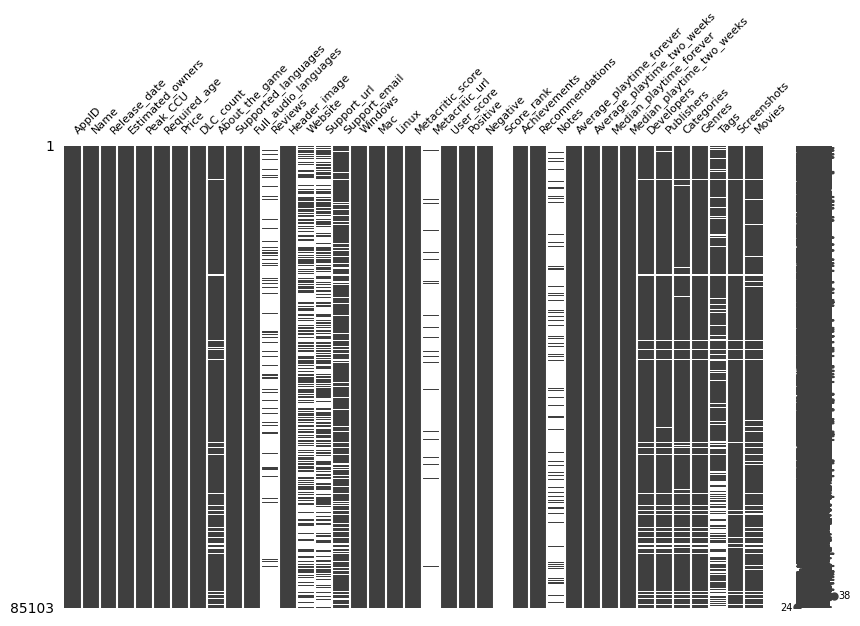

In [ ]:
# Visualizing the missing data in the dataset in a matrix plot
msno.matrix(games_df, figsize=(10, 6), fontsize=8)
plt.show()

Each row in the matrix plot represents an individual observation and each column represents a variable. Whitespaces in the bars indicate the presence of missing values.

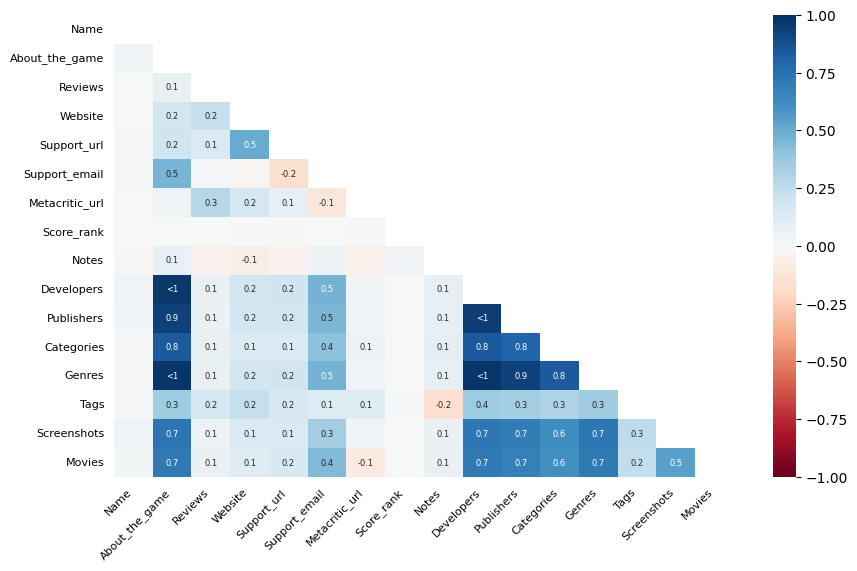

In [ ]:
# Plotting a heatmap of missing data to examine correlations
msno.heatmap(games_df, figsize=(10, 6), fontsize=8)
plt.show()

The method of handling missing values depends on the percentage of missing data in a column.

In [ ]:
def calc_missing_percentage(df):
  missing_dict = {}
  for col in df.columns:
    if df[col].isnull().sum() > 0:
      missing_percentage = (df[col].isnull().sum() / len(df)) * 100
      missing_dict[col] = missing_percentage.round(2)
  return missing_dict

In [ ]:
# use the function calc_missing_percentage
missing_dict = calc_missing_percentage(games_df)
missing_dict = dict(sorted(missing_dict.items(), key=lambda item: item[1]))
missing_dict

{'Name': 0.01,
 'Screenshots': 2.36,
 'Genres': 4.18,
 'About_the_game': 4.19,
 'Developers': 4.21,
 'Publishers': 4.54,
 'Categories': 5.4,
 'Movies': 7.58,
 'Support_email': 15.98,
 'Tags': 24.79,
 'Support_url': 51.13,
 'Website': 53.64,
 'Notes': 84.7,
 'Reviews': 88.55,
 'Metacritic_url': 95.4,
 'Score_rank': 99.95}

Based on some of the commonly used approaches of handling missing values, the following operations will be performed:

*   `Name`, `Screenshots`, `Genres`, `About_the_game`, `Developers`, `Publishers`, `Categories`, `Movies`, `Support_email`, `Tags`: Imputation by most frequently accuring value in the column

*   `Support_url`, `Website`, `Notes`, `Reviews`, `Metacritic_url`, `Score_rank`: Column Deletion












In [ ]:
# Column deletion
games_df_cleaned = games_df.drop(columns=['Support_url', 'Website', 'Notes', 'Reviews', 'Metacritic_url', 'Score_rank'])

In [ ]:
# Simple Imputation
games_df_cleaned['Name'] = games_df_cleaned['Name'].fillna(games_df_cleaned['Name'].mode()[0])
games_df_cleaned['Screenshots'] = games_df_cleaned['Screenshots'].fillna(games_df_cleaned['Screenshots'].mode()[0])
games_df_cleaned['About_the_game'] = games_df_cleaned['About_the_game'].fillna(games_df_cleaned['About_the_game'].mode()[0])
games_df_cleaned['Genres'] = games_df_cleaned['Genres'].fillna(games_df_cleaned['Genres'].mode()[0])
games_df_cleaned['Developers'] = games_df_cleaned['Developers'].fillna(games_df_cleaned['Developers'].mode()[0])
games_df_cleaned['Publishers'] = games_df_cleaned['Publishers'].fillna(games_df_cleaned['Publishers'].mode()[0])
games_df_cleaned['Categories'] = games_df_cleaned['Categories'].fillna(games_df_cleaned['Categories'].mode()[0])
games_df_cleaned['Movies'] = games_df_cleaned['Movies'].fillna(games_df_cleaned['Movies'].mode()[0])
games_df_cleaned['Support_email'] = games_df_cleaned['Support_email'].fillna(games_df_cleaned['Support_email'].mode()[0])
games_df_cleaned['Tags'] = games_df_cleaned['Tags'].fillna(games_df_cleaned['Tags'].mode()[0])

In [ ]:
# Ensuring that all missing values have been handled --> should return empty dictionary
calc_missing_percentage(games_df_cleaned)

{}

In [ ]:
# Inspecting the range values of Estimated_owners column
games_df_cleaned['Estimated_owners'].unique()

array(['0 - 20000', '50000 - 100000', '20000 - 50000', '200000 - 500000',
       '100000 - 200000', '2000000 - 5000000', '0 - 0',
       '500000 - 1000000', '1000000 - 2000000', '20000000 - 50000000',
       '5000000 - 10000000', '10000000 - 20000000',
       '50000000 - 100000000', '100000000 - 200000000'], dtype=object)

In [ ]:
# Function to calculate the mean of the range
def calculate_mean(range_str):
    lower, upper = range_str.split(' - ')
    mean_value = (int(lower) + int(upper)) / 2
    return mean_value

In [ ]:
# Creating a dictionary of range:mean
estimated_owners_mean = {}
for i in games_df_cleaned['Estimated_owners'].unique():
  if '-' in i:
    estimated_owners_mean[i] = calculate_mean(i)
print(estimated_owners_mean)

{'0 - 20000': 10000.0, '50000 - 100000': 75000.0, '20000 - 50000': 35000.0, '200000 - 500000': 350000.0, '100000 - 200000': 150000.0, '2000000 - 5000000': 3500000.0, '0 - 0': 0.0, '500000 - 1000000': 750000.0, '1000000 - 2000000': 1500000.0, '20000000 - 50000000': 35000000.0, '5000000 - 10000000': 7500000.0, '10000000 - 20000000': 15000000.0, '50000000 - 100000000': 75000000.0, '100000000 - 200000000': 150000000.0}


In [ ]:
# Function to replace the string range with corresponding numeric mean value
def replace_range_with_mean(row):
  if row['Estimated_owners'] in estimated_owners_mean:
    return estimated_owners_mean[row['Estimated_owners']]
  else:
    return row['Estimated_owners']

In [ ]:
# Applying function to games_df_cleaned
games_df_cleaned['Estimated_owners'] = games_df_cleaned.apply(replace_range_with_mean, axis=1)

In [ ]:
# Feature Engineering - creating a new column using SteamDB total_rating formula
def calculate_total_rating(row):
  pos_score = row['Positive']
  neg_score = row['Negative']
  total_Reviews = pos_score + neg_score
  if total_Reviews == 0:
    return 0
  else:
    average = pos_score / total_Reviews
    total_score = average - (average*0.5) * 2**(-math.log10(total_Reviews+1))
    return total_score

Reference: https://steamdb.info/blog/steamdb-rating/

In [ ]:
# Applying function to games_df_cleaned
games_df_cleaned['total_rating'] = games_df_cleaned.apply(calculate_total_rating, axis=1)

In [ ]:
# Function to extract year from Release_date
def extract_year(row):
  date_str = row['Release_date']
  try:
    date_obj = parser.parse(date_str)
    return date_obj.year
  except ValueError:
    return None

In [ ]:
# Applying function to games_df_cleaned
games_df_cleaned['Release_year'] = games_df_cleaned.apply(extract_year, axis=1)

In [ ]:
games_df_cleaned.head()

,AppID,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,About_the_game,Supported_languages,...,Median_playtime_two_weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,total_rating,Release_year
0,20200,Galactic Bowling,"Oct 21, 2008",10000.0,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.279015,2008
1,655370,Train Bandit,"Oct 12, 2017",10000.0,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.779906,2017
2,1732930,Jolt Project,"Nov 17, 2021",10000.0,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.000000,2021
3,1355720,Henosis™,"Jul 23, 2020",10000.0,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.670594,2020
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000.0,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.735761,2020


## Exploring the Data to Derive Meaningful Insights

### Platform Analysis

**Goal**: Assess the popularity and performance of the game across different platforms.


**Relevant Columns**:

*   `Peak_CCU` (Number of concurrent users, yesterday)
*   `Average_playtime_forever`
*   `Median_playtime_forever`
*   `Average_playtime_two_weeks`
*   `Median_playtime_two_weeks`




In [ ]:
# relevant metrics for platform analysis
performance_columns = ['Peak_CCU', 'Average_playtime_forever', 'Median_playtime_forever', 'Average_playtime_two_weeks', 'Median_playtime_two_weeks']

In [ ]:
# segregating games based on the supported platform(s)
windows_only_df = games_df_cleaned[(games_df_cleaned['Windows'] == True)&(games_df_cleaned['Mac'] == False) & (games_df_cleaned['Linux'] == False)][performance_columns]
mac_only_df = games_df_cleaned[(games_df_cleaned['Mac'] == True)&(games_df_cleaned['Windows'] == False) & (games_df_cleaned['Linux'] == False)][performance_columns]
linux_only_df = games_df_cleaned[(games_df_cleaned['Linux'] == True)&(games_df_cleaned['Mac'] == False) & (games_df_cleaned['Windows'] == False)][performance_columns]
windows_and_mac_df = games_df_cleaned[(games_df_cleaned['Windows'] == True) & (games_df_cleaned['Mac'] == True)][performance_columns]
windows_and_linux_df = games_df_cleaned[(games_df_cleaned['Windows'] == True) & (games_df_cleaned['Linux'] == True)][performance_columns]
mac_and_linux_df = games_df_cleaned[(games_df_cleaned['Mac'] == True) & (games_df_cleaned['Linux'] == True)][performance_columns]
all_platforms_df = games_df_cleaned[performance_columns]

In [ ]:
# computing the mean of metrics
mean_windows_only_df = windows_only_df.mean()
mean_mac_only_df = mac_only_df.mean()
mean_linux_only_df = linux_only_df.mean()
mean_windows_and_mac_df = windows_and_mac_df.mean()
mean_windows_and_linux_df = windows_and_linux_df.mean()
mean_mac_and_linux_df = mac_and_linux_df.mean()
mean_all_platforms_df = all_platforms_df.mean()

In [ ]:
# combining the mean values into a dataframe
mean_df = pd.DataFrame({
    'Metric': mean_windows_only_df.index,
    'Windows Only': mean_windows_only_df.values,
    'Mac Only': mean_mac_only_df.values,
    'Linux Only': mean_linux_only_df.values,
    'Windows and Mac': mean_windows_and_mac_df.values,
    'Windows and Linux': mean_windows_and_linux_df.values,
    'Mac and Linux': mean_mac_and_linux_df.values,
    'All Platforms': mean_all_platforms_df.values
})

In [ ]:
mean_df.head()

,Metric,Windows Only,Mac Only,Linux Only,Windows and Mac,Windows and Linux,Mac and Linux,All Platforms
0,Peak_CCU,117.381352,0.041667,0.0,219.838465,251.739589,313.077084,134.872930
1,Average_playtime_forever,87.697177,3.333333,0.0,175.908847,167.623861,190.485453,104.729681
2,Median_playtime_forever,80.085212,3.333333,0.0,146.122923,136.091063,147.305321,93.316029
3,Average_playtime_two_weeks,10.361954,0.000000,0.0,12.691288,12.570241,14.470036,10.680105
4,Median_playtime_two_weeks,11.285043,0.000000,0.0,13.124756,12.063896,13.947027,11.467328


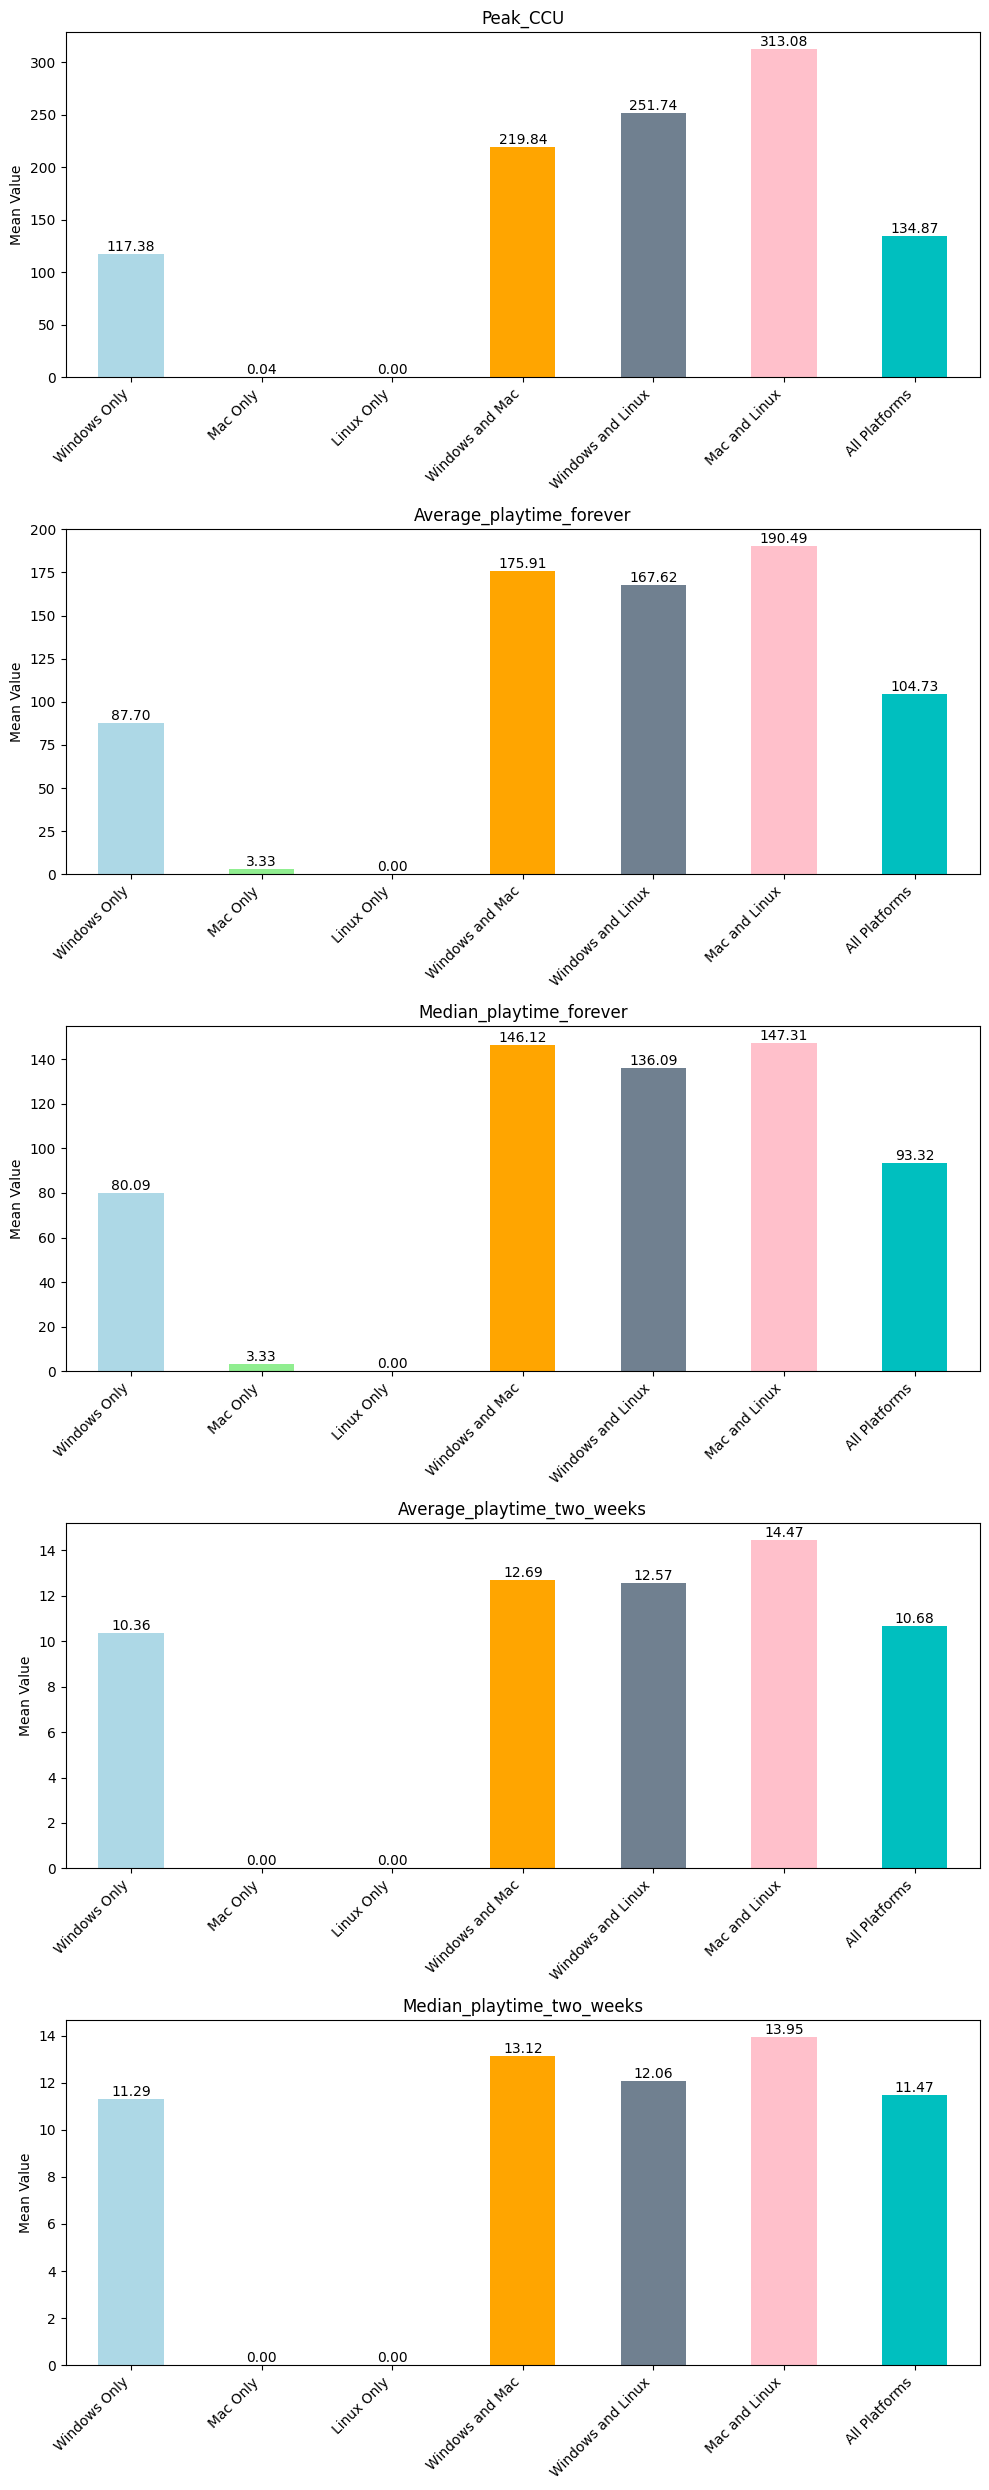

In [ ]:
# Creating bar plots to assess the performance of each platform and combination of platforms using the chosen metrics
fig, axes = plt.subplots(nrows=len(mean_df), ncols=1, figsize=(10, 5*len(mean_df)))
colors = ['lightblue', 'lightgreen', 'thistle', 'orange', 'slategray', 'pink', 'c']

for i, row in mean_df.iterrows():
    ax = axes[i]
    bars = row[1:].plot(kind='bar', ax=ax)
    ax.set_title(row['Metric'])
    ax.set_ylabel('Mean Value')
    ax.set_xticklabels(row.index[1:], rotation=45, ha='right')
    i = 0
    for bar in bars.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom'
        )
        bar.set_facecolor(colors[i])
        i += 1

plt.tight_layout()
plt.show()


**Takeaway:** Based on the bar plots above, games supporting both `Mac` and `Linux` have the highest performance metric values across all supporting platforms.


### Genre Analysis

**Goal**: Identify popular and high-performing genres

**Relevant Columns**:
*   `Genres`
*   `User_score`
*   `Metacritic_score`
*   `Peak_CCU`
*   `Estimated_owners`
*   `Recommendations`





In [ ]:
# Computing the mean values of chosen metrics per genre/genre groups
games_df_genres = games_df_cleaned.groupby('Genres').agg({'User_score': 'mean', 'Metacritic_score': 'mean', 'Peak_CCU': 'mean', 'Estimated_owners': 'mean', 'Recommendations': 'mean'}).reset_index()

In [ ]:
games_df_genres.head()

,Genres,User_score,Metacritic_score,Peak_CCU,Estimated_owners,Recommendations
0,Accounting,0.0,0.0,0.0,10000.0,0.0
1,"Accounting,Animation & Modeling,Audio Producti...",0.0,0.0,0.0,10000.0,0.0
2,"Accounting,Animation & Modeling,Audio Producti...",0.0,0.0,7.5,112500.0,323.5
3,"Accounting,Design & Illustration,Education,Uti...",0.0,0.0,0.0,0.0,0.0
4,"Accounting,Education,Software Training,Utiliti...",0.0,0.0,0.0,10000.0,0.0


We can create a new variable called `genre_popularity` which uses the features in `games_df_genres` to assign a score to each genre group.

**Assumption:** All features have an equal weight. This means that we are assuming that all features are equally important in determining the popularity of a genre group.



However, in practice, features usually have different weights associated to them based on their business importance.

In [ ]:
# Assign equal weights to each feature
genre_weights = {'User_score': 0.2, 'Metacritic_score': 0.2, 'Peak_CCU': 0.2, 'Estimated_owners': 0.2, 'Recommendations': 0.2}

In [ ]:
# Function to compute the popularity of the genre
def calculate_genre_popularity(row):
    weighted_sum = 0
    for feature, weight in genre_weights.items():
      if feature == 'Estimated_owners':
        weighted_sum += np.log10(row[feature]) * weight
      else:
        weighted_sum += row[feature] * weight
    return weighted_sum

In [ ]:
# Applying the function to the dataframe
games_df_genres['genre_popularity'] = games_df_genres.apply(calculate_genre_popularity, axis=1)

In [ ]:
print("Based on the above analysis, we can determine that the genre groups arranged in decreasing order of popularity are:\n")
genre_groups = [i for i in games_df_genres.sort_values(by='genre_popularity', ascending=False)['Genres']]
print(genre_groups)
print(len(genre_groups))

Based on the above analysis, we can determine that the genre groups arranged in decreasing order of popularity are:

['Casual,Indie,Animation & Modeling,Design & Illustration,Photo Editing,Utilities', 'Action,Adventure,Free to Play,Massively Multiplayer', 'Action,Casual,Indie,Massively Multiplayer,Sports', 'Action,Adventure,Indie,Massively Multiplayer,RPG', 'Action,Adventure,Massively Multiplayer', 'Action,RPG,Simulation,Strategy,Early Access', 'Action,Massively Multiplayer,Simulation,Strategy', 'Action,Adventure,Massively Multiplayer,RPG,Simulation,Strategy', 'Action,Free to Play,Strategy', 'Adventure,Casual,Free to Play,Massively Multiplayer,Simulation,Sports,Early Access', 'Action,Free to Play', 'Action,Massively Multiplayer,Racing', 'Action,Indie,Massively Multiplayer,Simulation,Strategy', 'Action,Adventure,Racing,Simulation,Sports', 'Action,Adventure,Massively Multiplayer,RPG', 'Action,Adventure,Casual,Indie,Massively Multiplayer,Racing,RPG,Strategy,Early Access', 'Adventure,Simul

In [ ]:
# Obtaining the top 10 performing solo genres from genre groups
top_10_genre_groups = genre_groups[:10]
temp = [i.split(',') for i in top_10_genre_groups]
print(temp)
top_10_genre_groups_flattened = [item for sublist in temp for item in sublist]
print(top_10_genre_groups_flattened)

[['Casual', 'Indie', 'Animation & Modeling', 'Design & Illustration', 'Photo Editing', 'Utilities'], ['Action', 'Adventure', 'Free to Play', 'Massively Multiplayer'], ['Action', 'Casual', 'Indie', 'Massively Multiplayer', 'Sports'], ['Action', 'Adventure', 'Indie', 'Massively Multiplayer', 'RPG'], ['Action', 'Adventure', 'Massively Multiplayer'], ['Action', 'RPG', 'Simulation', 'Strategy', 'Early Access'], ['Action', 'Massively Multiplayer', 'Simulation', 'Strategy'], ['Action', 'Adventure', 'Massively Multiplayer', 'RPG', 'Simulation', 'Strategy'], ['Action', 'Free to Play', 'Strategy'], ['Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'Simulation', 'Sports', 'Early Access']]
['Casual', 'Indie', 'Animation & Modeling', 'Design & Illustration', 'Photo Editing', 'Utilities', 'Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'Action', 'Casual', 'Indie', 'Massively Multiplayer', 'Sports', 'Action', 'Adventure', 'Indie', 'Massively Multiplayer', 'RPG', 'Action

In [ ]:
Counter(top_10_genre_groups_flattened)

Counter({'Casual': 3,
         'Indie': 3,
         'Animation & Modeling': 1,
         'Design & Illustration': 1,
         'Photo Editing': 1,
         'Utilities': 1,
         'Action': 8,
         'Adventure': 5,
         'Free to Play': 3,
         'Massively Multiplayer': 7,
         'Sports': 2,
         'RPG': 3,
         'Simulation': 4,
         'Strategy': 4,
         'Early Access': 2})

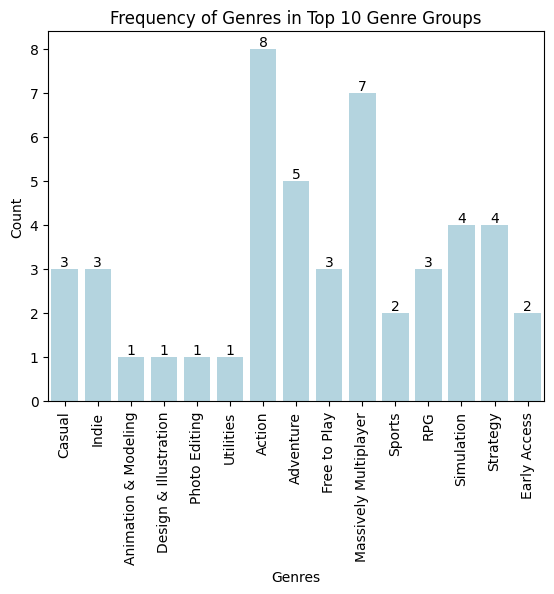

In [ ]:
# Countplot to visualize the popularity of genres
ax = sns.countplot(x=top_10_genre_groups_flattened, color='lightblue')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Frequency of Genres in Top 10 Genre Groups')
plt.show()

In [ ]:
top_10_solo_genres = [k for (k,v) in Counter(top_10_genre_groups_flattened).items()]
print(top_10_solo_genres)

['Casual', 'Indie', 'Animation & Modeling', 'Design & Illustration', 'Photo Editing', 'Utilities', 'Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'Sports', 'RPG', 'Simulation', 'Strategy', 'Early Access']


**Takeaway:** The top 10 game genres based on popularity and performance are - 'Casual', 'Indie', 'Animation & Modeling', 'Design & Illustration', 'Photo Editing', 'Utilities', 'Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'Sports', 'RPG', 'Simulation', 'Strategy', 'Early Access'

### Monetization Analysis

**Goal**: Determine appropriate pricing strategies for games

**Relevant Columns**:

*   `Estimated_owners`
*   `Price`
*   `total_rating`
*   `User_score`

In [ ]:
# Picking the relevant features for monetization analysis
monetization_df = games_df_cleaned[['Estimated_owners', 'Price', 'total_rating', 'User_score']]
monetization_df.head()

,Estimated_owners,Price,total_rating,User_score
0,10000.0,19.99,0.279015,0
1,10000.0,0.99,0.779906,0
2,10000.0,4.99,0.000000,0
3,10000.0,5.99,0.670594,0
4,10000.0,0.00,0.735761,0


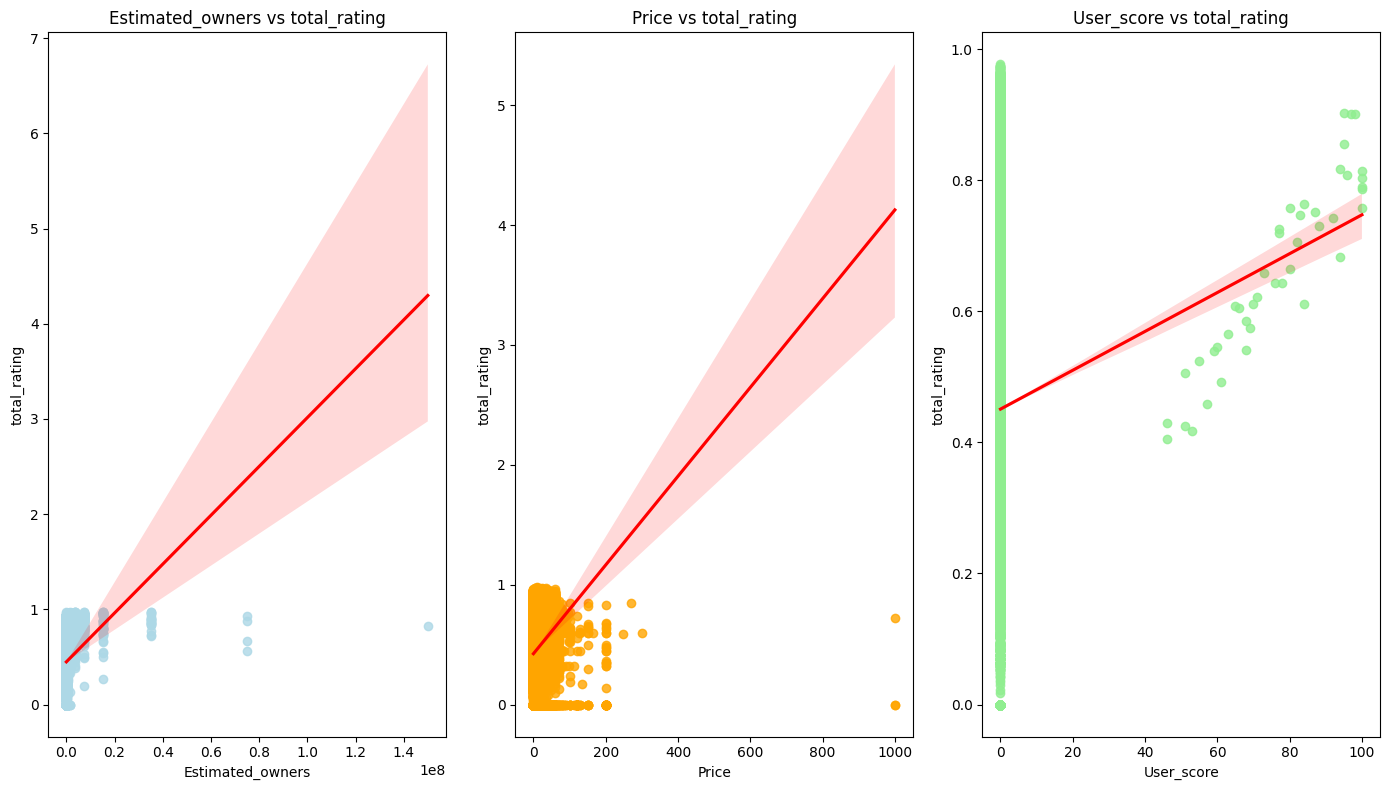

In [ ]:
# Plotting the data and fitting a linear regression model to evaluate relationship
fig, ax = plt.subplots(1,3)
fig.set_size_inches(14, 8)
sns.regplot(x=monetization_df['Estimated_owners'], y=monetization_df['total_rating'], ax=ax[0], color='lightblue', fit_reg=True, line_kws=dict(color="r"))
sns.regplot(x=monetization_df['Price'], y=monetization_df['total_rating'], ax=ax[1], color='orange', fit_reg=True, line_kws=dict(color="r"))
sns.regplot(x=monetization_df['User_score'], y=monetization_df['total_rating'], ax=ax[2], color='lightgreen', robust=True, line_kws=dict(color="r"))
ax[0].set_title('Estimated_owners vs total_rating')
ax[1].set_title('Price vs total_rating')
ax[2].set_title('User_score vs total_rating')
plt.tight_layout()
plt.show()

From the above plots, we can observe the following:


*   The relationships between `total_rating` and log(`Estimated_owners)`/`Price`/`User_Score` denote **positive correlations**. This means that as variable A increases, variable B also increases and vice versa.
*   The relationship between log(`Estimated_owners`) and `total_rating` is clear as the probability of a game being rated increases with an increase in the number of owners, i.e. popularity.
*   The relationship between `Price` and `total_rating` shows that as as the games become more expensive, they receive more ratings and those ratings are usually high. This could be due to the higher investment from the user's side in terms of money. It could also be due to more expensive games having better features, thus justifying their tendency to receive high rating.
*   The relationship between `User_score` and `total_rating` is that while many games do not have non-zero values for `User_score`, the games which do have `User_score` between 50 and 100 and this value shows a clear increase as `total_rating` increases.

Let us focus more on `Price` across genres due to its direct importance to monetization analysis.

In [ ]:
# Extracting relevant columns
games_price_df = games_df_cleaned[['AppID', 'Price', 'Genres']]
def convert_to_list(row):
  return row['Genres'].split(',')
games_price_df['Genres'] = games_price_df.apply(convert_to_list, axis=1).reset_index(drop=True)

In [ ]:
games_price_df

,AppID,Price,Genres
0,20200,19.99,"[Casual, Indie, Sports]"
1,655370,0.99,"[Action, Indie]"
2,1732930,4.99,"[Action, Adventure, Indie, Strategy]"
3,1355720,5.99,"[Adventure, Casual, Indie]"
4,1139950,0.00,"[Adventure, Indie]"
...,...,...,...
85098,2669080,0.00,"[Adventure, Simulation]"
85099,2736910,0.00,"[Casual, Indie]"
85100,2743220,0.00,"[Adventure, Simulation]"
85101,2293130,3.99,"[Action, Casual, Indie, RPG, Simulation]"


In [ ]:
# explode method converts each element of the specified column(s) into a row
exploded_df = games_price_df.explode('Genres')
exploded_df = exploded_df[exploded_df['Genres'].isin(top_10_solo_genres)]
exploded_df = exploded_df[exploded_df['Price'] > 0]

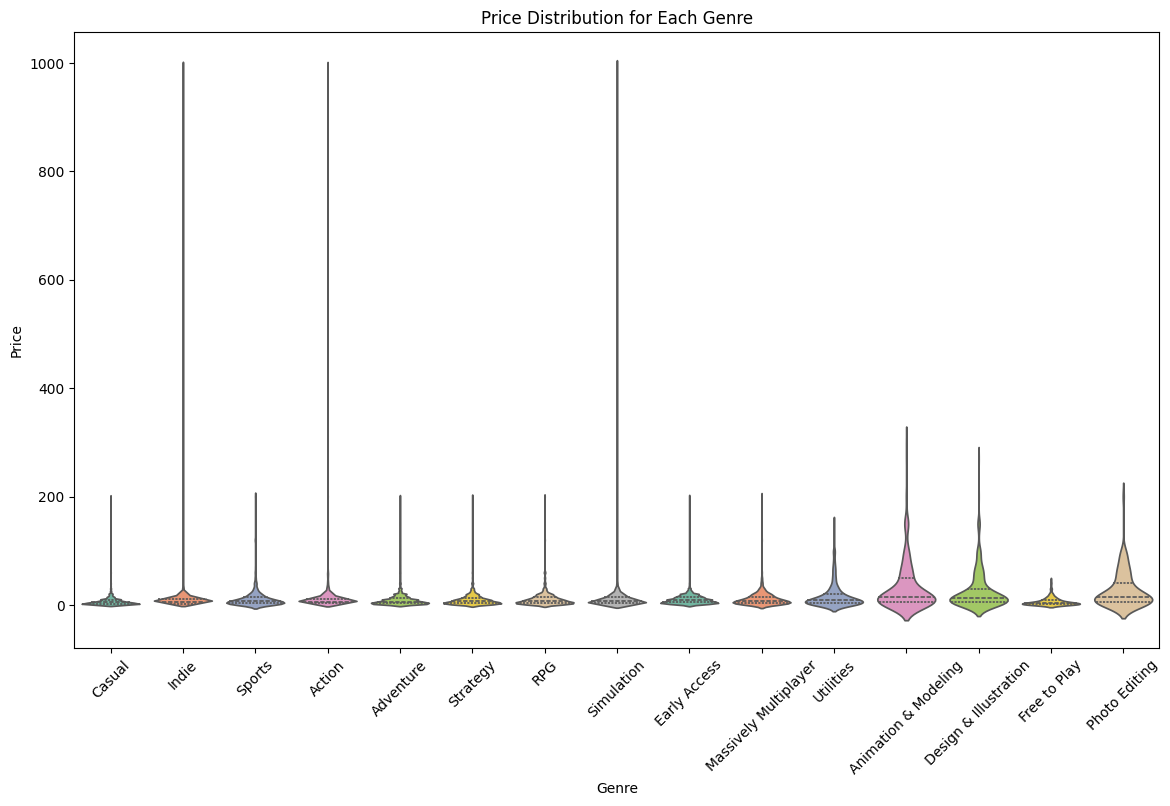

In [ ]:
# violin plot to visualize the price distribution of each genre
plt.figure(figsize=(14, 8))
sns.violinplot(x='Genres', y='Price', data=exploded_df, inner='quartile', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.title('Price Distribution for Each Genre')
plt.show()

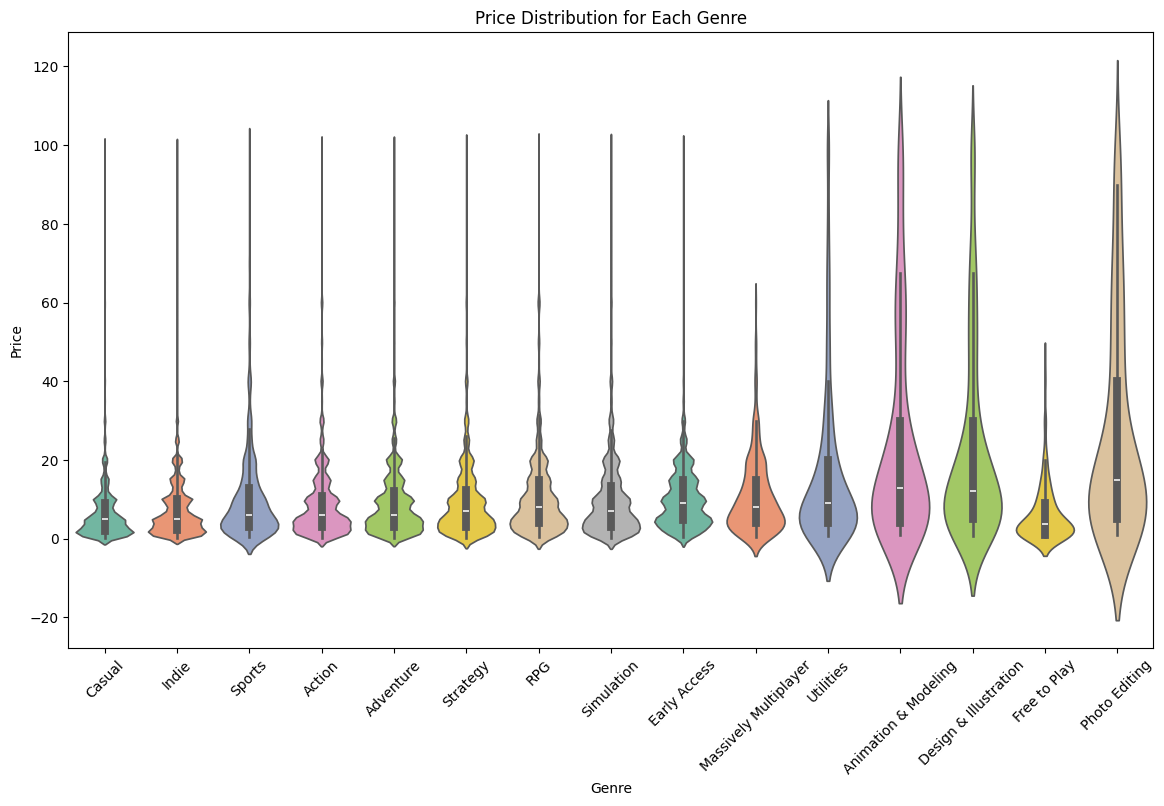

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Genres', y='Price', data=exploded_df[exploded_df['Price']<=100], inner='box', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.title('Price Distribution for Each Genre')
plt.show()

**Takeaway:** By visualizing the violin plot, it is observed that games belonging to the most popular genres are usually priced below 20 to 30 USD. The maximum cap on price for most popular genres seems to be around 200 USD.

Additional domain knowledge is required to understand other contributing factors which are used to determine the price.

### Regional Analysis

**Goal:** Compare performance of games in different regions.

**Relevant Columns:**


*   `Estimated_owners`
*   `Supported_languages`
*   `Full_audio_languages`
*   `User_Score`
*   `total_rating`



In [ ]:
games_df_cleaned.head()

,AppID,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,About_the_game,Supported_languages,...,Median_playtime_two_weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,total_rating,Release_year
0,20200,Galactic Bowling,"Oct 21, 2008",10000.0,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.279015,2008
1,655370,Train Bandit,"Oct 12, 2017",10000.0,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.779906,2017
2,1732930,Jolt Project,"Nov 17, 2021",10000.0,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.000000,2021
3,1355720,Henosis™,"Jul 23, 2020",10000.0,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.670594,2020
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000.0,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.735761,2020


In [ ]:
# Selecting relevant columns for regional analysis
regions_df = games_df_cleaned[['AppID','Supported_languages', 'Full_audio_languages', 'Estimated_owners', 'Average_playtime_forever', 'User_score', 'total_rating']]
regions_df.head()

,AppID,Supported_languages,Full_audio_languages,Estimated_owners,Average_playtime_forever,User_score,total_rating
0,20200,['English'],[],10000.0,0,0,0.279015
1,655370,"['English', 'French', 'Italian', 'German', 'Sp...",[],10000.0,0,0,0.779906
2,1732930,"['English', 'Portuguese - Brazil']",[],10000.0,0,0,0.000000
3,1355720,"['English', 'French', 'Italian', 'German', 'Sp...",[],10000.0,0,0,0.670594
4,1139950,"['English', 'Spanish - Spain']",[],10000.0,0,0,0.735761


In [ ]:
# Function to convert a string of list to data type list
def convert_to_list(row):
  actual_list = row.strip("[]").replace("'", "").split(", ")
  return actual_list
regions_df['Supported_languages'] = regions_df['Supported_languages'].apply(convert_to_list)
regions_df['Full_audio_languages'] = regions_df['Full_audio_languages'].apply(convert_to_list)

In [ ]:
# Creating individual rows for each element in support_languages and aull_audio_languages
regions_exploded_df = regions_df.explode('Supported_languages').explode('Full_audio_languages')
regions_exploded_df.head()

,AppID,Supported_languages,Full_audio_languages,Estimated_owners,Average_playtime_forever,User_score,total_rating
0,20200,English,,10000.0,0,0,0.279015
1,655370,English,,10000.0,0,0,0.779906
1,655370,French,,10000.0,0,0,0.779906
1,655370,Italian,,10000.0,0,0,0.779906
1,655370,German,,10000.0,0,0,0.779906


In [ ]:
# Replacing blank values by the string 'Not Available'
def handle_blank_cell(row):
  if row == '':
    return 'Not Available'
  else:
    return row
regions_exploded_df['Supported_languages'] = regions_exploded_df['Supported_languages'].apply(handle_blank_cell)
regions_exploded_df['Full_audio_languages'] = regions_exploded_df['Full_audio_languages'].apply(handle_blank_cell)

In [ ]:
regions_exploded_df.head()

,AppID,Supported_languages,Full_audio_languages,Estimated_owners,Average_playtime_forever,User_score,total_rating
0,20200,English,Not Available,10000.0,0,0,0.279015
1,655370,English,Not Available,10000.0,0,0,0.779906
1,655370,French,Not Available,10000.0,0,0,0.779906
1,655370,Italian,Not Available,10000.0,0,0,0.779906
1,655370,German,Not Available,10000.0,0,0,0.779906


In [ ]:
# Getting the top 10 supported languages
language_counts = list(Counter(regions_exploded_df['Supported_languages']).items())
language_counts.sort(key=lambda x: x[1], reverse=True)
top_10_languages = [k for k,v in language_counts[:10]]
top_10_languages

['English',
 'German',
 'French',
 'Spanish - Spain',
 'Simplified Chinese',
 'Russian',
 'Japanese',
 'Italian',
 'Korean',
 'Portuguese - Brazil']

In [ ]:
top_10_regions_df = regions_exploded_df[regions_exploded_df['Supported_languages'].isin(top_10_languages)]

When data spans several orders of magnitude, the interpretation of graphs is challenging. Thus, the log transformation compresses the range, making it easier to visualize and compare the data.

In [ ]:
# Computing the log of the number of estimated owners
top_10_regions_df['Log_Estimated_owners'] = np.log10(top_10_regions_df['Estimated_owners'])
top_10_regions_df = top_10_regions_df.reset_index()

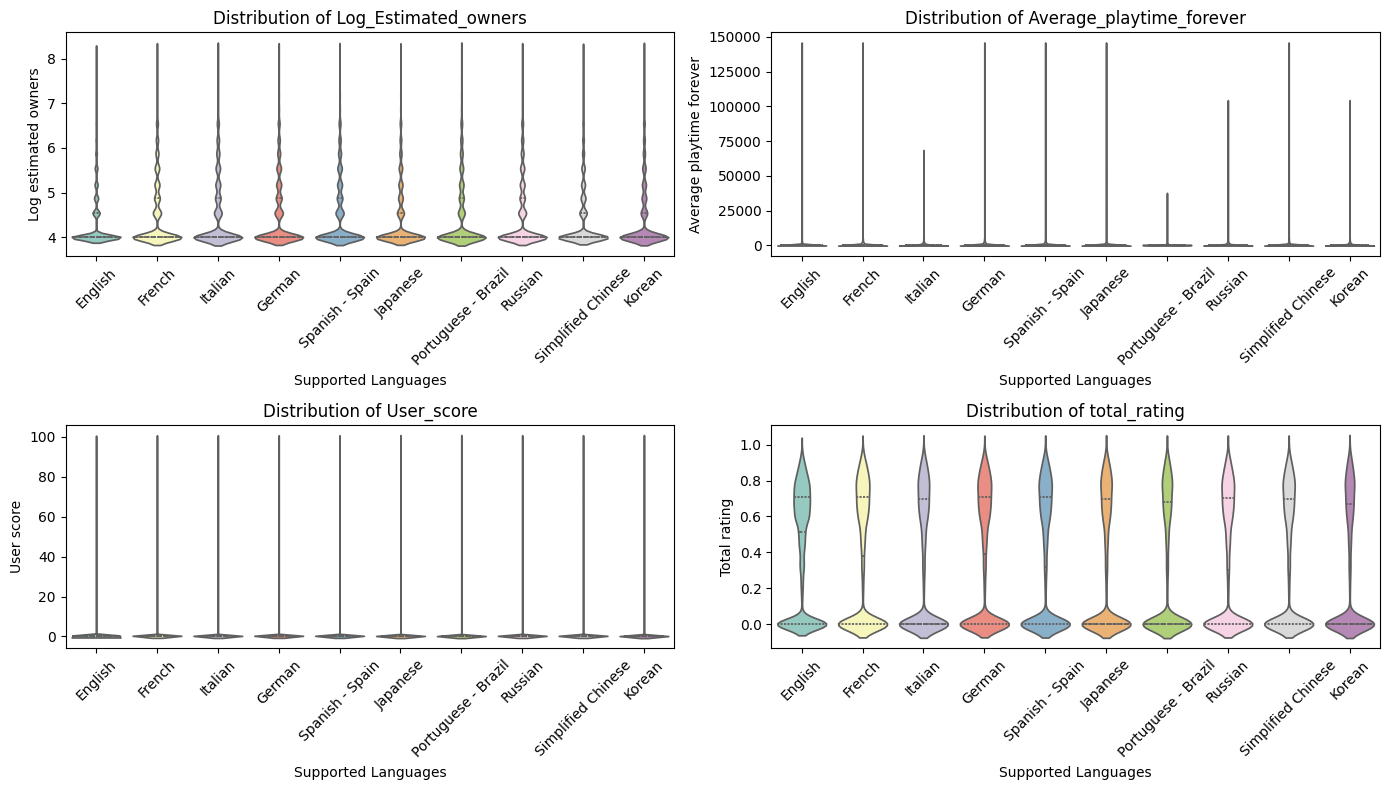

In [ ]:
# Visualizing the distribution of metrics for the supported languages using  violin plots
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
columns = ['Log_Estimated_owners', 'Average_playtime_forever', 'User_score', 'total_rating']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.violinplot(x='Supported_languages', y=column, data=top_10_regions_df, inner='quartile', palette='Set3', ax=ax[row][col])
    ax[row][col].set_title(f'Distribution of {column}')
    ax[row][col].set_xlabel('Supported Languages')
    ax[row][col].set_ylabel(column.replace('_', ' ').capitalize())
    ax[row][col].set_xticklabels(ax[row][col].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Obtaining top 10 full audio languages
fa_language_counts = list(Counter(regions_exploded_df['Full_audio_languages']).items())
fa_language_counts.sort(key=lambda x: x[1], reverse=True)
fa_top_10_languages = [k for k,v in fa_language_counts[:10]]
fa_top_10_languages

['Not Available',
 'English',
 'Russian',
 'German',
 'Japanese',
 'Simplified Chinese',
 'French',
 'Spanish - Spain',
 'Traditional Chinese',
 'Italian']

In [ ]:
fa_top_10_regions_df = regions_exploded_df[regions_exploded_df['Full_audio_languages'].isin(fa_top_10_languages)]

In [ ]:
fa_top_10_regions_df['Log_Estimated_owners'] = np.log10(fa_top_10_regions_df['Estimated_owners'])
fa_top_10_regions_df = fa_top_10_regions_df.reset_index()

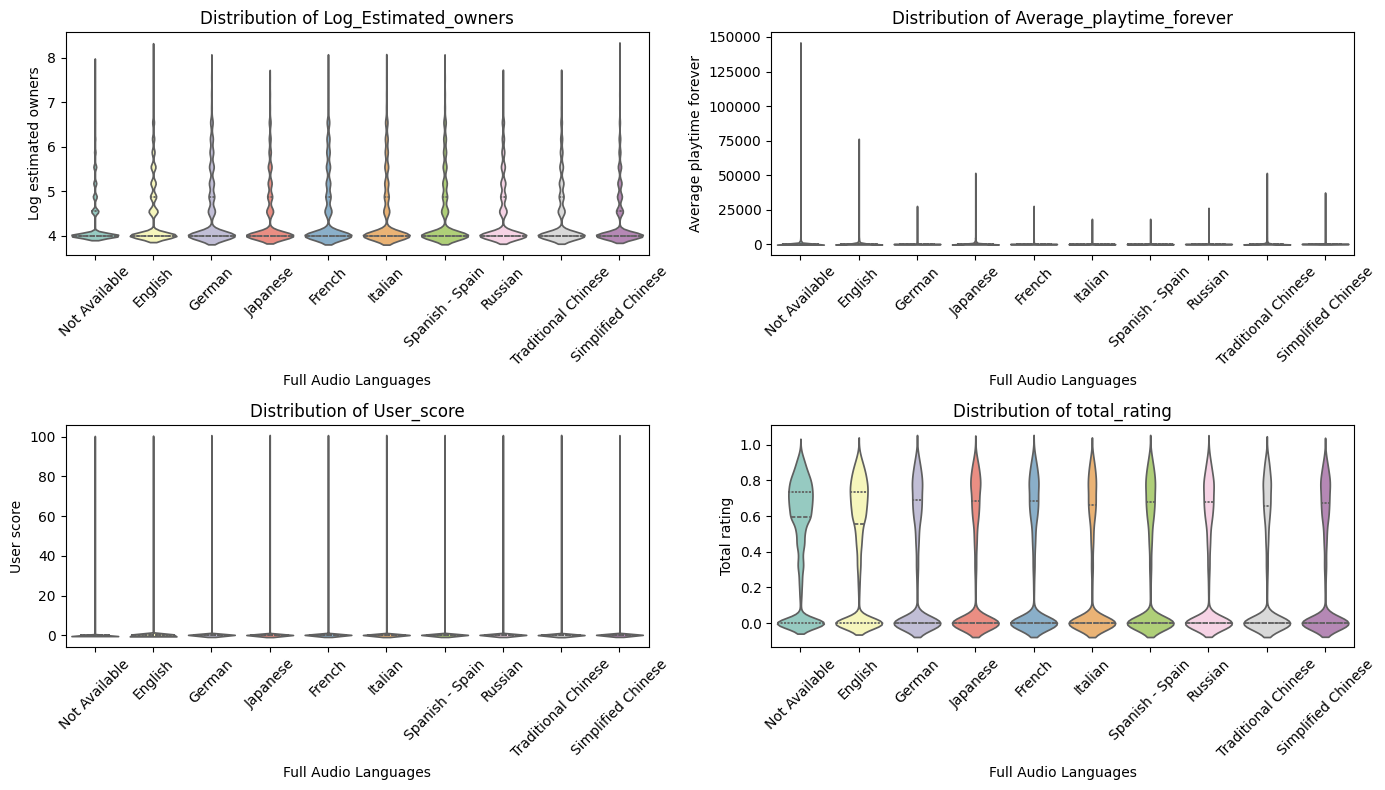

In [ ]:
# Violin plot to visualize metrics for all full audio languages
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
columns = ['Log_Estimated_owners', 'Average_playtime_forever', 'User_score', 'total_rating']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.violinplot(x='Full_audio_languages', y=column, data=fa_top_10_regions_df, inner='quartile', palette='Set3', ax=ax[row][col])
    ax[row][col].set_title(f'Distribution of {column}')
    ax[row][col].set_xlabel('Full Audio Languages')
    ax[row][col].set_ylabel(column.replace('_', ' ').capitalize())
    ax[row][col].set_xticklabels(ax[row][col].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

**Takeaway:**
The top supported languages for games are as follows -
 * 'English',
 * 'German',
 * 'French',
 * 'Spanish - Spain',
 * 'Simplified Chinese',
 * 'Russian',
 * 'Japanese',
 * 'Italian',
 * 'Korean',
 * 'Portuguese - Brazil'

The top full audio languages for games are the same as supported languages with the exception of 'Traditional Chinese'.



### Release Timing Analysis

**Goal**: Determine optimal release windows based on historical performance.

**Relevant Columns**:


*   `Release_date`
*   `User_score`
*   `Peak_CCU`
*   `Estimated_owners`





In [ ]:
# Function to extract from Release_date
def extract_date_component(row, component):
  date_str = row['Release_date']
  try:
    date_obj = parser.parse(date_str)
    if component == 'month':
      return date_obj.month
    elif component == 'week':
      return date_obj.isocalendar().week
    elif component == 'dayofweek':
      return date_obj.weekday()
  except ValueError:
    return None

In [ ]:
# Creating columns for release month, week and day of week as well as log of estimated owners
games_df_cleaned['Release_month'] = games_df_cleaned.apply(lambda row: extract_date_component(row, component='month'), axis=1)
games_df_cleaned['Release_week'] = games_df_cleaned.apply(lambda row: extract_date_component(row, component='week'), axis=1)
games_df_cleaned['Release_day'] = games_df_cleaned.apply(lambda row: extract_date_component(row, component='dayofweek'), axis=1)
games_df_cleaned['Log_Estimated_owners'] = np.log10(games_df_cleaned['Estimated_owners'])
games_df_cleaned.head()

,AppID,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,About_the_game,Supported_languages,...,Genres,Tags,Screenshots,Movies,total_rating,Release_year,Release_month,Release_week,Release_day,Log_Estimated_owners
0,20200,Galactic Bowling,"Oct 21, 2008",10000.0,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,"Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.279015,2008,10,43,1,4.0
1,655370,Train Bandit,"Oct 12, 2017",10000.0,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.779906,2017,10,41,3,4.0
2,1732930,Jolt Project,"Nov 17, 2021",10000.0,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,"Action,Adventure,Indie,Strategy","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.000000,2021,11,46,2,4.0
3,1355720,Henosis™,"Jul 23, 2020",10000.0,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.670594,2020,7,30,3,4.0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000.0,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,"Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.735761,2020,2,6,0,4.0


In [ ]:
# Using a mark to remove -infinity values after log transformation
mask = games_df_cleaned['Log_Estimated_owners'] != -np.inf
release_timing_df = games_df_cleaned[mask]

In [ ]:
release_timing_df.head()

,AppID,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,About_the_game,Supported_languages,...,Genres,Tags,Screenshots,Movies,total_rating,Release_year,Release_month,Release_week,Release_day,Log_Estimated_owners
0,20200,Galactic Bowling,"Oct 21, 2008",10000.0,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,"Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.279015,2008,10,43,1,4.0
1,655370,Train Bandit,"Oct 12, 2017",10000.0,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.779906,2017,10,41,3,4.0
2,1732930,Jolt Project,"Nov 17, 2021",10000.0,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,"Action,Adventure,Indie,Strategy","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.000000,2021,11,46,2,4.0
3,1355720,Henosis™,"Jul 23, 2020",10000.0,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.670594,2020,7,30,3,4.0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000.0,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,"Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.735761,2020,2,6,0,4.0


In [ ]:
# columns chosen for release timing analysis
eval_columns = ['User_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating', 'Price']

In [ ]:
# performing standard scaling to standardize features by removing the mean and scaling to unit variance.
std = StandardScaler()
release_timing_df = release_timing_df[['Release_year',	'Release_month',	'Release_week',	'Release_day', 'User_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating', 'Price']]
release_timing_df[eval_columns] = std.fit_transform(release_timing_df[eval_columns])
release_timing_df.head()

,Release_year,Release_month,Release_week,Release_day,User_score,Peak_CCU,Log_Estimated_owners,total_rating,Price
0,2008,10,43,1,-0.02391,-0.026841,-0.487882,-0.870499,0.960517
1,2017,10,41,3,-0.02391,-0.026841,-0.487882,0.928325,-0.558295
2,2021,11,46,2,-0.02391,-0.026841,-0.487882,-1.872511,-0.238545
3,2020,7,30,3,-0.02391,-0.026841,-0.487882,0.535757,-0.158607
4,2020,2,6,0,-0.02391,-0.026841,-0.487882,0.769787,-0.637433


In [ ]:
# Aggregating metrics by month
monthly_agg_df = release_timing_df.groupby('Release_month')[eval_columns].mean().reset_index()
monthly_agg_df['Month_Name'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_agg_df.head()

,Release_month,User_score,Peak_CCU,Log_Estimated_owners,total_rating,Price,Month_Name
0,1,0.011487,-0.014521,-0.027624,0.001551,-0.066298,January
1,2,-0.008891,0.040114,0.005226,0.018328,-0.027100,February
2,3,-0.016367,-0.009653,0.006955,0.049676,-0.005527,March
3,4,-0.015234,-0.012231,0.039806,0.038194,-0.010787,April
4,5,-0.011701,-0.013446,0.034394,0.021288,-0.008507,May


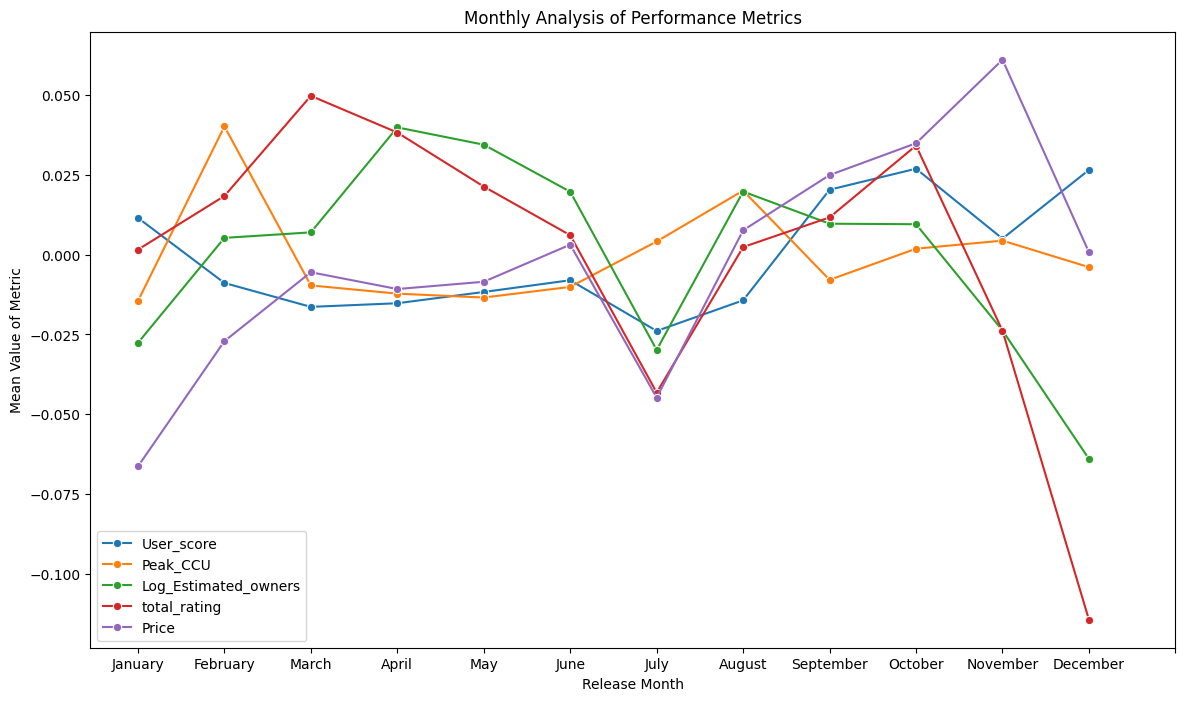

In [ ]:
# Plotting Monthy Analysis
plt.figure(figsize=(14, 8))
for col in eval_columns:
    sns.lineplot(x='Month_Name', y=col, data=monthly_agg_df, label=col, marker='o')
plt.xlabel('Release Month')
plt.xticks(range(0, 13))
plt.ylabel('Mean Value of Metric')
plt.title('Monthly Analysis of Performance Metrics')
plt.legend()
plt.show()

In [ ]:
# Getting the months with highest averages
months_of_highest_avg = monthly_agg_df[eval_columns].idxmax().apply(lambda x: monthly_agg_df['Month_Name'][x])
print("Highest average metrics by month:\n", months_of_highest_avg)

Highest average metrics by month:
 User_score               October
Peak_CCU                February
Log_Estimated_owners       April
total_rating               March
Price                   November
dtype: object


In [ ]:
# Getting the months with lowest averages
months_of_lowest_avg = monthly_agg_df[eval_columns].idxmin().apply(lambda x: monthly_agg_df['Month_Name'][x])
print("Lowest average metrics by month:\n", months_of_lowest_avg)

Lowest average metrics by month:
 User_score                  July
Peak_CCU                 January
Log_Estimated_owners    December
total_rating            December
Price                    January
dtype: object


**Monthly Trends**

The (Highest, Lowest) average values of the chosen metrics have been observed as -

*   `User_score`: (October, July)
*   `Peak_CCU`: (February, January)
*   `Log_Estimated_owners`: (April, December)
*   `total_rating`: (March, December)
*   `Price`: (November, January)

In [ ]:
# Aggregating metrics by week
weekly_agg_df = release_timing_df.groupby('Release_week')[eval_columns].mean().reset_index()
weekly_agg_df.tail()

,Release_week,User_score,Peak_CCU,Log_Estimated_owners,total_rating,Price
48,49,0.031097,0.001246,0.004369,-0.067915,0.022368
49,50,0.001945,-0.008256,-0.020977,-0.015854,0.030559
50,51,0.040405,0.008920,-0.097174,-0.141983,-0.046303
51,52,0.075194,-0.022928,-0.173775,-0.271882,-0.014146
52,53,-0.023910,-0.026530,-0.120888,0.084854,-0.090457


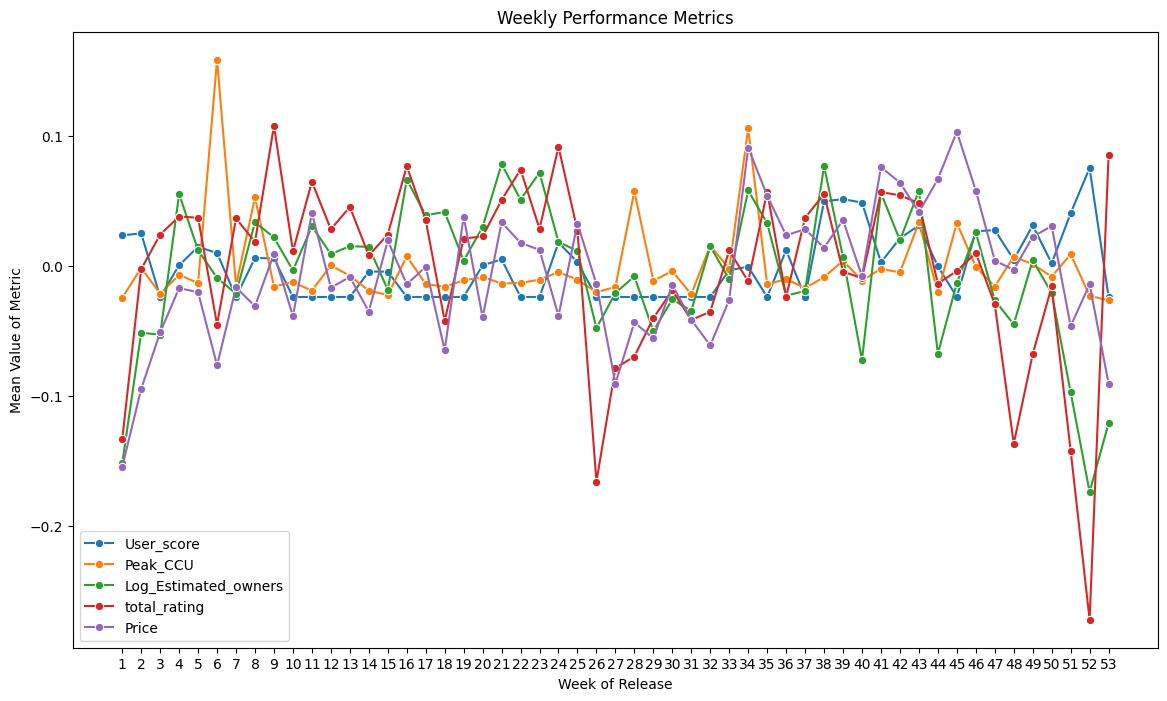

In [ ]:
# Plotting weekly analysis
plt.figure(figsize=(14, 8))
for col in eval_columns:
    sns.lineplot(x='Release_week', y=col, data=weekly_agg_df, label=col, marker='o')
plt.xlabel('Week of Release')
plt.xticks(range(1, 54))
plt.ylabel('Mean Value of Metric')
plt.title('Weekly Performance Metrics')
plt.legend()
plt.show()

In [ ]:
# Getting the weeks with highest average values
weeks_of_highest_avg = weekly_agg_df[eval_columns].idxmax().apply(lambda x: weekly_agg_df['Release_week'][x])
print("Highest average metrics by week:\n", weeks_of_highest_avg)

Highest average metrics by week:
 User_score              52
Peak_CCU                 6
Log_Estimated_owners    21
total_rating             9
Price                   45
dtype: int64


In [ ]:
# Getting the weeks with lowest average values
weeks_of_lowest_avg = weekly_agg_df[eval_columns].idxmin().apply(lambda x: weekly_agg_df['Release_week'][x])
print("Lowest average metrics by week:\n", weeks_of_lowest_avg)

Lowest average metrics by week:
 User_score              22
Peak_CCU                53
Log_Estimated_owners    52
total_rating            52
Price                    1
dtype: int64


**Weekly Trends**:
The (Highest, Lowest) average values of the chosen metrics have been observed as -

*   `User_score`: (52, 17)           
*   `Peak_CCU`: (6, 53)              
*   `Log_Estimated_owners`: (21, 53)     
*   `total_rating`: (9, 52)              
*   `Price`: (45, 1)  

Weekly analysis confirms that the weekly trends align closely with the monthly trends.

In [ ]:
# Aggregating metrics by Day Of Week (DOW)
dow_agg_df = release_timing_df.groupby('Release_day')[eval_columns].mean().reset_index()
dow_agg_df['Day_Name'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_agg_df.tail()

,Release_day,User_score,Peak_CCU,Log_Estimated_owners,total_rating,Price,Day_Name
2,2,-0.008711,-0.005153,0.007482,0.030569,-0.003864,Wednesday
3,3,-0.001543,0.006659,0.054506,0.063186,0.077218,Thursday
4,4,0.005310,-0.004724,-0.046451,-0.038401,-0.055126,Friday
5,5,0.004123,-0.025067,-0.263405,-0.359486,-0.095214,Saturday
6,6,-0.012323,-0.015929,-0.254444,-0.219608,-0.134875,Sunday


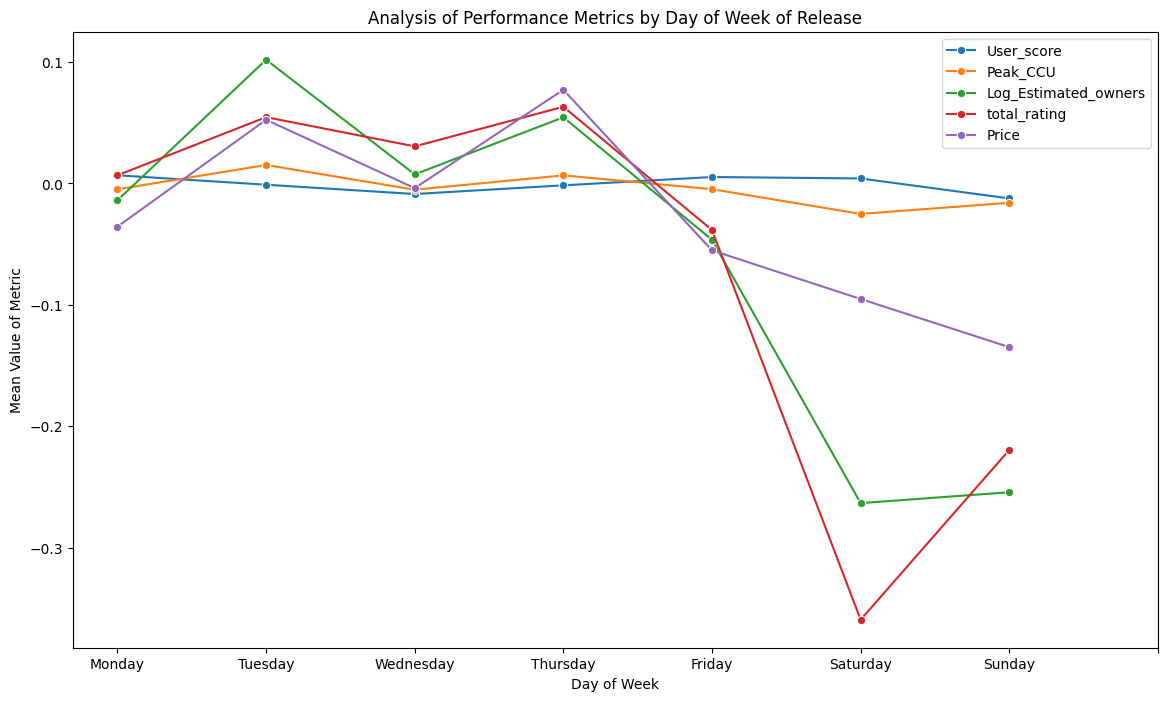

In [ ]:
# Plotting DOW Analysis
plt.figure(figsize=(14, 8))
for col in eval_columns:
    sns.lineplot(x='Day_Name', y=col, data=dow_agg_df, label=col, marker='o')
plt.xlabel('Day of Week')
plt.xticks(range(0, 8))
plt.ylabel('Mean Value of Metric')
plt.title('Analysis of Performance Metrics by Day of Week of Release')
plt.legend()
plt.show()

In [ ]:
# Getting the DOW with highest averages
dow_of_highest_avg = dow_agg_df[eval_columns].idxmax().apply(lambda x: dow_agg_df['Day_Name'][x])
print("Highest average metrics by day of week:\n", dow_of_highest_avg)

Highest average metrics by day of week:
 User_score                Monday
Peak_CCU                 Tuesday
Log_Estimated_owners     Tuesday
total_rating            Thursday
Price                   Thursday
dtype: object


In [ ]:
# Getting the DOW with lowest averages
dow_of_lowest_avg = dow_agg_df[eval_columns].idxmin().apply(lambda x: dow_agg_df['Day_Name'][x])
print("Lowest average metrics by day of week:\n", dow_of_lowest_avg)

Lowest average metrics by day of week:
 User_score                Sunday
Peak_CCU                Saturday
Log_Estimated_owners    Saturday
total_rating            Saturday
Price                     Sunday
dtype: object


**Day of Week Trends**:
The (Highest, Lowest) average values of the chosen metrics have been observed as -

*   `User_score`: (Monday, Sunday)            
*   `Peak_CCU`: (Tuesday, Saturday)              
*   `Log_Estimated_owners`: (Tuesday, Saturday)      
*   `total_rating`: (Thursday, Saturday)             
*   `Price`: (Thursday, Sunday)

**Potential Reasons** for high or low values on certain **Months** based on the observed trends are as follows:

User Score:
- Highest in October: Since many high-profile games are released in October to capture the holiday season sales, it could lead to better user scores.
- Lowest in July: Players may be less engaged with gaming during summer as outdoor activities are abundant.

Peak_CCU (Concurrent Users):
- Highest in February: Players are more likely to stay indoors and play games during the colder months, leading to higher peak concurrent users.
- Lowest in January: After the holiday season, there might be a temporary dip in gaming activity as players return to work or school.

Log_Estimated_owners:
- Highest in April: Spring sales events, such as Easter or Spring Break promotions, can boost game ownership numbers.
- Lowest in December: Players might be spending on other holiday-related activities or gifts, leading to lower game purchases, especially after Black-Friday and Cyber-Monday.

Total_rating:
- Highest in March: Developers might release updates or new content in the spring, boosting ratings.
- Lowest in December: Since December sees numerous game releases, some titles might not stand out, leading to lower average ratings.

Price:
- Highest in November: Prices might be higher before holiday sales events to maximize revenue.
- Lowest in January: Retailers and digital stores may discount games to clear inventory from the holiday season.

**Potential Reasons** for high or low values on certain **Day Of Week** based on the observed trends are as follows:

User_score:
- Highest on Monday: Players might start their week with new games, leading to more positive reviews.

- Lowest on Sunday: Players might be more critical after a week of gaming, leading to lower scores.

Peak_CCU (Concurrent Users):
- Highest on Tuesday: Players might be more engaged during the mid-week, especially if new content is released.

- Lowest on Saturday: Players might be engaged in outdoor or social activities over the weekend.


Log_Estimated_owners:
- Highest on Tuesday: Tuesdays are common for game sales and promotions, driving higher ownership.

- Lowest on Saturday: Potential buyers might be occupied with weekend activities, leading to fewer purchases.

Total_rating:
- Highest on Thursday: Developers might release high-quality updates or games before the weekend.

- Lowest on Saturday: A higher volume of games and content might be reviewed over the weekend, leading to more mixed ratings.

Price:
- Highest on Thursday: Company might set higher prices before the weekend or release DLCs, expecting increased sales traffic.

- Lowest on Sunday: Company might offer discounts on Sundays to boost end-of-week sales. It is also possible that Sunday might be used for clearing out less popular titles or excess inventory.

**Takeaway:** By examining the above line plots and the potential reaons listed, we can suggest the following release timings based on the chosen metrics - `User_score`, `Peak_CCU`,  `Log_Estimated_owners`, `total_rating` and `Price`:

The months October, Feb, April, March, November can be positively considered to determine the time of release. Months January, December can be avoided while planning the release.
             
The days Mondays, Tuesdays and Thursdays can be chosen while deciding the time of release. Saturdays, Sundays, are the least desirable choice due to consistently low observed values.







---



### Developer and Publisher Analysis

**Goal**: Evaluate the track record of developers and publishers.

**Relevant Columns**:
*   `Developers`
*   `Publishers`
*   `User_score`
*   `Metacritic_score`
*   `Peak_CCU`
*   `Log_Estimated_owners`
*   `total_rating`










In [ ]:
mask = games_df_cleaned['Log_Estimated_owners'] != -np.inf
dev_pub_df = games_df_cleaned[mask]

In [ ]:
# Computing the mean and median of metrics for developers and publishers
developer_metrics_mean = dev_pub_df.groupby('Developers')[['User_score', 'Metacritic_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating']].mean().reset_index()
publisher_metrics_mean = dev_pub_df.groupby('Publishers')[['User_score', 'Metacritic_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating']].mean().reset_index()
developer_metrics_median = dev_pub_df.groupby('Developers')[['User_score', 'Metacritic_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating']].median().reset_index()
publisher_metrics_median = dev_pub_df.groupby('Publishers')[['User_score', 'Metacritic_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating']].median().reset_index()

In [ ]:
# dev_means = {}
# for col in ['User_score', 'Metacritic_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating']:
#   dev_means[col] = developer_metrics_mean[col].mean()
# print(dev_means)

In [ ]:
# pub_means = {}
# for col in ['User_score', 'Metacritic_score', 'Peak_CCU', 'Log_Estimated_owners', 'total_rating']:
#   pub_means[col] = publisher_metrics_mean[col].mean()
# print(pub_means)

In [ ]:
# Combining the mean and median dataframes for developers and publishers
developer_metrics = developer_metrics_mean.merge(developer_metrics_median, on='Developers', suffixes=('_mean', '_median'))
publisher_metrics = publisher_metrics_mean.merge(publisher_metrics_median, on='Publishers', suffixes=('_mean', '_median'))

In [ ]:
# Creating a column to specify the type of entity (developer or publisher)
developer_metrics['Entity_Type'] = 'Developer'
publisher_metrics['Entity_Type'] = 'Publisher'

In [ ]:
developer_metrics.rename(columns={'Developers': 'Entity'}, inplace=True)
publisher_metrics.rename(columns={'Publishers': 'Entity'}, inplace=True)

In [ ]:
developer_metrics.head()

,Entity,User_score_mean,Metacritic_score_mean,Peak_CCU_mean,Log_Estimated_owners_mean,total_rating_mean,User_score_median,Metacritic_score_median,Peak_CCU_median,Log_Estimated_owners_median,total_rating_median,Entity_Type
0,!CyberApex (SkagoGames),0.0,0.0,0.000000,4.000000,0.594164,0.0,0.0,0.0,4.000000,0.594164,Developer
1,#12,0.0,0.0,0.000000,4.000000,0.640795,0.0,0.0,0.0,4.000000,0.640795,Developer
2,#NVJOB,0.0,0.0,0.000000,4.000000,0.481109,0.0,0.0,0.0,4.000000,0.481109,Developer
3,#workshop,0.0,0.0,4.666667,4.654399,0.925738,0.0,0.0,5.0,4.544068,0.926670,Developer
4,$mitE,0.0,0.0,0.000000,4.000000,0.000000,0.0,0.0,0.0,4.000000,0.000000,Developer


In [ ]:
publisher_metrics.tail()

,Entity,User_score_mean,Metacritic_score_mean,Peak_CCU_mean,Log_Estimated_owners_mean,total_rating_mean,User_score_median,Metacritic_score_median,Peak_CCU_median,Log_Estimated_owners_median,total_rating_median,Entity_Type
38819,（Hong Kong）GKD Game Studio,0.0,0.0,196.0,5.875061,0.758753,0.0,0.0,196.0,5.875061,0.758753,Publisher
38820,Ｌｅｍｏｎ Ｂａｌｍ,0.0,0.0,0.0,4.544068,0.868607,0.0,0.0,0.0,4.544068,0.868607,Publisher
38821,𝕲𝖗𝖆𝖓𝖉𝕸𝖎𝖓𝖎 𝕾𝖙𝖚𝖉𝖎𝖔𝖘 (ᚴᛘᛋ),0.0,0.0,0.0,4.000000,0.566755,0.0,0.0,0.0,4.000000,0.566755,Publisher
38822,📚瓜山书坊Guashan Bookshop,0.0,0.0,0.0,4.000000,0.391689,0.0,0.0,0.0,4.000000,0.391689,Publisher
38823,🚀 Raiser Games,0.0,0.0,12.0,4.942828,0.726403,0.0,0.0,5.5,5.025576,0.745104,Publisher


In [ ]:
# Concatenating the datasets
combined_metrics = pd.concat([developer_metrics, publisher_metrics]).reset_index(drop=True)
combined_metrics.head()
combined_metrics.columns

Index(['Entity', 'User_score_mean', 'Metacritic_score_mean', 'Peak_CCU_mean',
       'Log_Estimated_owners_mean', 'total_rating_mean', 'User_score_median',
       'Metacritic_score_median', 'Peak_CCU_median',
       'Log_Estimated_owners_median', 'total_rating_median', 'Entity_Type'],
      dtype='object')

In [ ]:
# Checking for missing values
combined_metrics.isna().sum()

Entity                         0
User_score_mean                0
Metacritic_score_mean          0
Peak_CCU_mean                  0
Log_Estimated_owners_mean      0
total_rating_mean              0
User_score_median              0
Metacritic_score_median        0
Peak_CCU_median                0
Log_Estimated_owners_median    0
total_rating_median            0
Entity_Type                    0
dtype: int64

In [ ]:
# Using mean user score to pick top 3 developers
top_developers_by_mean = developer_metrics.sort_values(by='User_score_mean', ascending=False).head(3)

print("Top 3 Developers by Mean User Score:\n")
top_developers_by_mean

Top 3 Developers by Mean User Score:



,Entity,User_score_mean,Metacritic_score_mean,Peak_CCU_mean,Log_Estimated_owners_mean,total_rating_mean,User_score_median,Metacritic_score_median,Peak_CCU_median,Log_Estimated_owners_median,total_rating_median,Entity_Type
23041,Maya Games,100.0,0.0,0.0,4.0,0.757071,100.0,0.0,0.0,4.0,0.757071,Developer
24619,"NEKOPURU,ジーメン",92.0,0.0,0.0,4.0,0.742743,92.0,0.0,0.0,4.0,0.742743,Developer
29264,R I MAD,88.0,0.0,2.0,4.0,0.730853,88.0,0.0,2.0,4.0,0.730853,Developer


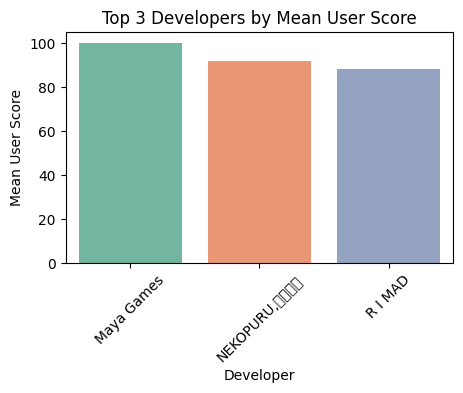

In [ ]:
# Plotting the mean user score of top 3 developers
plt.figure(figsize=(5, 3))
sns.barplot(x='Entity', y='User_score_mean', data=top_developers_by_mean, palette='Set2')
plt.title('Top 3 Developers by Mean User Score')
plt.xlabel('Developer')
plt.ylabel('Mean User Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Using median user score to pick top 3 developers
top_developers_by_median = developer_metrics.sort_values(by='User_score_median', ascending=False).head(3)

print("Top 3 Developers by Median User Score:\n")
top_developers_by_median

Top 3 Developers by Median User Score:



,Entity,User_score_mean,Metacritic_score_mean,Peak_CCU_mean,Log_Estimated_owners_mean,total_rating_mean,User_score_median,Metacritic_score_median,Peak_CCU_median,Log_Estimated_owners_median,total_rating_median,Entity_Type
23041,Maya Games,100.0,0.0,0.0,4.0,0.757071,100.0,0.0,0.0,4.0,0.757071,Developer
24619,"NEKOPURU,ジーメン",92.0,0.0,0.0,4.0,0.742743,92.0,0.0,0.0,4.0,0.742743,Developer
29264,R I MAD,88.0,0.0,2.0,4.0,0.730853,88.0,0.0,2.0,4.0,0.730853,Developer


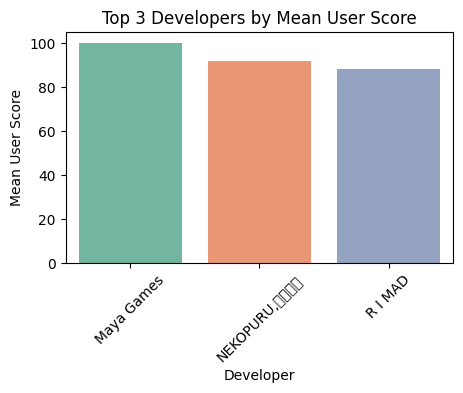

In [ ]:
# Plotting the median user score of top 3 developers
plt.figure(figsize=(5, 3))
sns.barplot(x='Entity', y='User_score_mean', data=top_developers_by_mean, palette='Set2')
plt.title('Top 3 Developers by Mean User Score')
plt.xlabel('Developer')
plt.ylabel('Mean User Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Using mean user score to pick top 3 publishers
top_publishers_by_mean = publisher_metrics.sort_values(by='User_score_mean', ascending=False).head(3)
print("Top 3 Publishers by Average User Score:\n")
top_publishers_by_mean

Top 3 Publishers by Average User Score:



,Entity,User_score_mean,Metacritic_score_mean,Peak_CCU_mean,Log_Estimated_owners_mean,total_rating_mean,User_score_median,Metacritic_score_median,Peak_CCU_median,Log_Estimated_owners_median,total_rating_median,Entity_Type
19826,Maya Games,100.0,0.0,0.0,4.000000,0.757071,100.0,0.0,0.0,4.000000,0.757071,Publisher
26211,"Remtairy,Kagura Games",97.0,0.0,38.0,4.544068,0.900691,97.0,0.0,38.0,4.544068,0.900691,Publisher
23167,"Outlawed Games,Ecchi Empire",92.0,0.0,0.0,4.000000,0.742743,92.0,0.0,0.0,4.000000,0.742743,Publisher


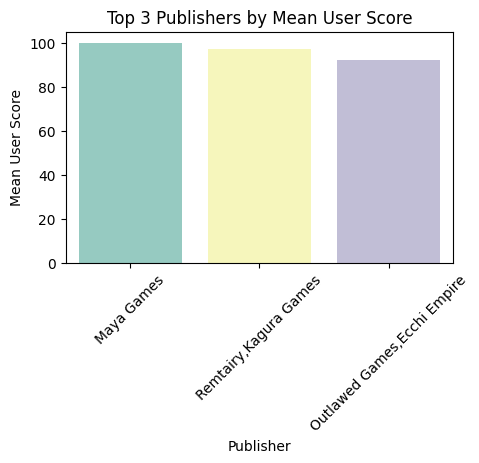

In [ ]:
# Plotting the mean user score of top 3 publishers
plt.figure(figsize=(5, 3))
sns.barplot(x='Entity', y='User_score_mean', data=top_publishers_by_mean, palette='Set3')
plt.title('Top 3 Publishers by Mean User Score')
plt.xlabel('Publisher')
plt.ylabel('Mean User Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Using median user score to pick top 3 publishers
top_publishers_by_median = publisher_metrics.sort_values(by='User_score_median', ascending=False).head(3)
print("Top 3 Publishers by Median User Score:\n")
top_publishers_by_median

Top 3 Publishers by Median User Score:



,Entity,User_score_mean,Metacritic_score_mean,Peak_CCU_mean,Log_Estimated_owners_mean,total_rating_mean,User_score_median,Metacritic_score_median,Peak_CCU_median,Log_Estimated_owners_median,total_rating_median,Entity_Type
19826,Maya Games,100.0,0.0,0.0,4.000000,0.757071,100.0,0.0,0.0,4.000000,0.757071,Publisher
26211,"Remtairy,Kagura Games",97.0,0.0,38.0,4.544068,0.900691,97.0,0.0,38.0,4.544068,0.900691,Publisher
23167,"Outlawed Games,Ecchi Empire",92.0,0.0,0.0,4.000000,0.742743,92.0,0.0,0.0,4.000000,0.742743,Publisher


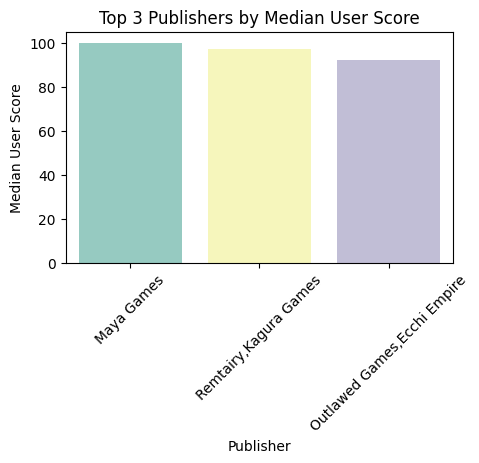

In [ ]:
# Plotting the median user score of top 3 publishers
plt.figure(figsize=(5, 3))
sns.barplot(x='Entity', y='User_score_mean', data=top_publishers_by_median, palette='Set3')
plt.title('Top 3 Publishers by Median User Score')
plt.xlabel('Publisher')
plt.ylabel('Median User Score')
plt.xticks(rotation=45)
plt.show()

- The plots for mean and median values of `User_score` for the top 3 developers and publishers indicates that the distribution of the data is symmetric and does not have high skewness.

- **Top 3 Developers**: Maya Games, NEKOPURU,ジーメン, R I MAD

- **Top 3 Publishers**: Maya Games, Remtairy, Kagura Games, Outlawed Games, Ecchi Empire

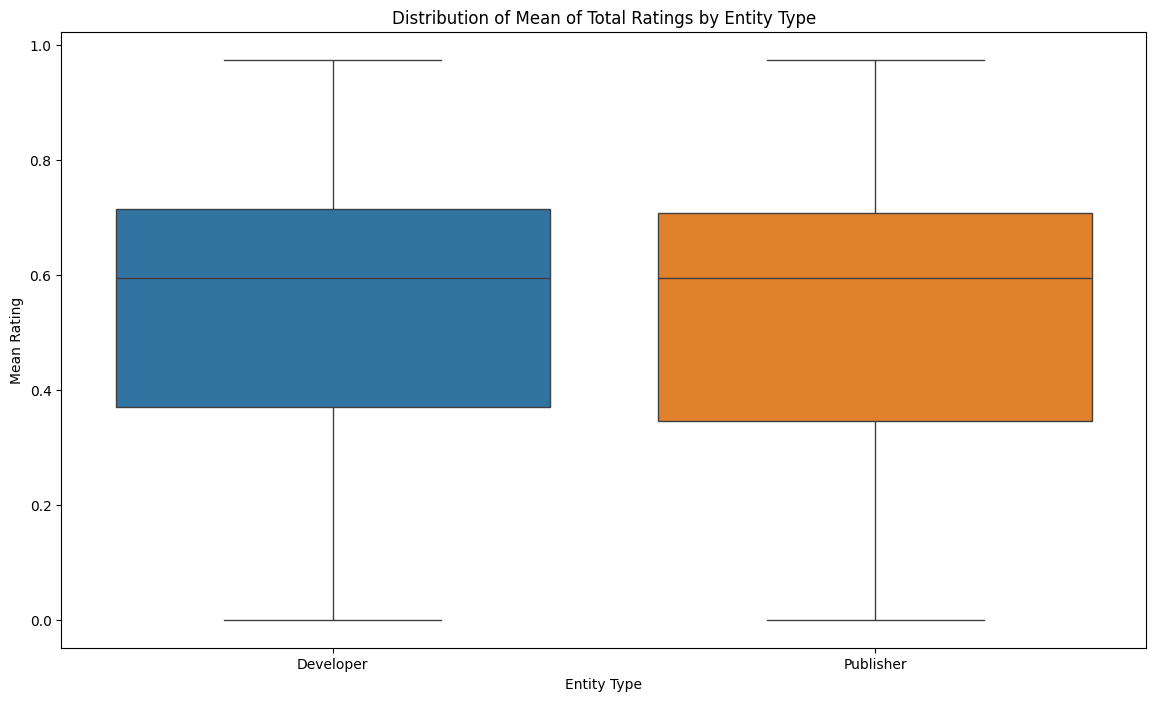

In [ ]:
# Plotting the distribution of mean for developers and publishers
plt.figure(figsize=(14, 8))
sns.boxplot(x='Entity_Type', y='total_rating_mean', data=combined_metrics, hue='Entity_Type')
plt.title('Distribution of Mean of Total Ratings by Entity Type')
plt.xlabel('Entity Type')
plt.ylabel('Mean Rating')
plt.show()

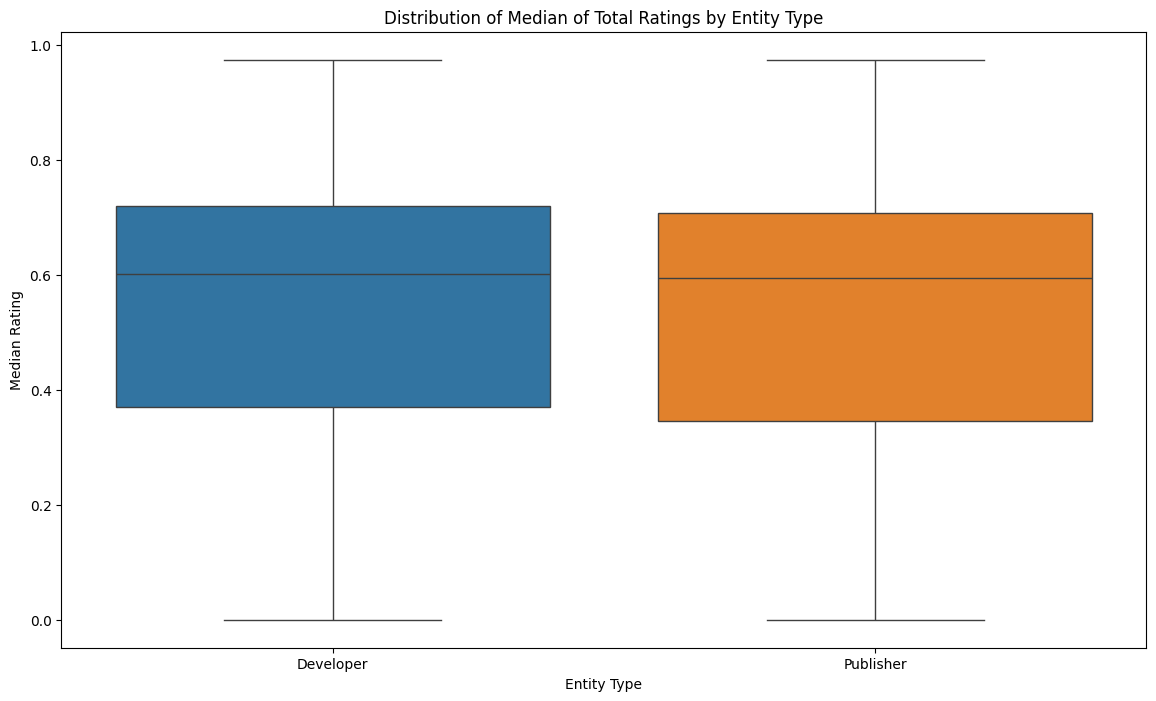

In [ ]:
# Plotting the distribution of median for developers and publishers
plt.figure(figsize=(14, 8))
sns.boxplot(x='Entity_Type', y='total_rating_median', data=combined_metrics, hue='Entity_Type')
plt.title('Distribution of Median of Total Ratings by Entity Type')
plt.xlabel('Entity Type')
plt.ylabel('Median Rating')
plt.show()

In [ ]:
# Checking the number of games produced by top 3 developers
top_3_devs = ['Maya Games', 'NEKOPURU,ジーメン', 'R I MAD']
for i in range(len(top_3_devs)):
  print(f"Number of games produced by {top_3_devs[i]}:", games_df_cleaned[games_df_cleaned['Developers'] == top_3_devs[i]].shape[0])

Number of games produced by Maya Games: 1
Number of games produced by NEKOPURU,ジーメン: 1
Number of games produced by R I MAD: 1


In [ ]:
# Checking the number of games produced by top 3 publishers
top_3_pubs = ['Maya Games', 'Remtairy,Kagura Games', 'Outlawed Games,Ecchi Empire']
for i in range(len(top_3_pubs)):
  print(f"Number of games produced by {top_3_pubs[i]}:", games_df_cleaned[games_df_cleaned['Publishers'] == top_3_pubs[i]].shape[0])

Number of games produced by Maya Games: 1
Number of games produced by Remtairy,Kagura Games: 1
Number of games produced by Outlawed Games,Ecchi Empire: 1


After examining the data, it can be observed that the developers and publishers with top 3 ratings have produced only one game each.



Therefore, to find the most **consistenty** top performing developers and publishers, we need to ensure they have released multiple games and maintained high performance across those releases.

In [ ]:
# Computing the number of games produced by each developer and publisher
developer_game_counts = games_df_cleaned['Developers'].value_counts()
publisher_game_counts = games_df_cleaned['Publishers'].value_counts()
developer_game_counts, publisher_game_counts

(Developers
 Choice of Games                        3741
 Creobit                                 138
 Laush Dmitriy Sergeevich                138
 EroticGamesClub                         119
 Boogygames Studios                      117
                                        ... 
 Meow Games                                1
 rongyou                                   1
 DracoSoftware, LLC                        1
 playerzklubVRstudios,CrystalMesh UG       1
 MCA                                       1
 Name: count, Length: 49870, dtype: int64,
 Publishers
 Big Fish Games       4366
 8floor                268
 SEGA                  182
 HH-Games              173
 Strategy First        169
                      ... 
 Ginger Tree Games       1
 Zeroscale               1
 JIW-Games               1
 Sneaky Party LLC        1
 MCA                     1
 Name: count, Length: 43366, dtype: int64)

In [ ]:
# Statistical description
developer_game_counts.describe(), publisher_game_counts.describe()

(count    49870.000000
 mean         1.706497
 std         16.993201
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max       3741.000000
 Name: count, dtype: float64,
 count    43366.000000
 mean         1.962436
 std         21.539229
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max       4366.000000
 Name: count, dtype: float64)

A reasonable threshold for minimum number of games released to check for consistency is to set threshold = 50.

In [ ]:
# Setting minimum threshold and selecting consistent developers and publishers accordingly
min_games_threshold = 50
consistent_developers = developer_game_counts[developer_game_counts >= min_games_threshold].index
consistent_publishers = publisher_game_counts[publisher_game_counts >= min_games_threshold].index
print("Number of Consistent Developers: ", len(consistent_developers), "Consistent Developers:\n", consistent_developers)
print("Number of Consistent Publishers: ", len(consistent_publishers), "Consistent Publishers:\n", consistent_publishers)

Number of Consistent Developers:  30 Consistent Developers:
 Index(['Choice of Games', 'Creobit', 'Laush Dmitriy Sergeevich',
       'EroticGamesClub', 'Boogygames Studios', 'Sokpop Collective',
       'KOEI TECMO GAMES CO., LTD.', 'Hosted Games',
       'Atomic Fabrik,Cristian Manolachi', 'Reforged Group', 'Elephant Games',
       'Blender Games', 'IR Studio', 'Somer Games', 'SEGA', 'Cyber Keks',
       'Dnovel', 'Ripknot Systems', 'RewindApp', 'AMAX Interactive',
       'William at Oxford', 'Individual Software', 'LTZinc', 'EpiXR Games UG',
       'Cute Hannah's Games', 'Eipix Entertainment', '玫瑰工作室',
       'Kairosoft Co.,Ltd', 'Nikita Ghost_RUS', 'Morning Shift Studios'],
      dtype='object', name='Developers')
Number of Consistent Publishers:  84 Consistent Publishers:
 Index(['Big Fish Games', '8floor', 'SEGA', 'HH-Games', 'Strategy First',
       'Square Enix', 'Laush Studio', 'Sekai Project', 'Choice of Games',
       'Ubisoft', 'THQ Nordic', 'Kagura Games',
       'Atomic Fab

In [ ]:
consistent_devs_df = games_df_cleaned[games_df_cleaned['Developers'].isin(consistent_developers)]
consistent_pubs_df = games_df_cleaned[games_df_cleaned['Publishers'].isin(consistent_publishers)]

In [ ]:
consistent_devs_df.head()

,AppID,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,About_the_game,Supported_languages,...,Genres,Tags,Screenshots,Movies,total_rating,Release_year,Release_month,Release_week,Release_day,Log_Estimated_owners
46,1777550,Fuyu no Tsuma,"Oct 15, 2021",10000.0,0,0,1.99,0,General Fuyu no Tsuma is an addicting game in ...,['English'],...,"Action,Adventure,Indie","Adventure,Indie,Casual,Puzzle,Hentai,Anime,2D,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.345997,2021,10,41,4,4.000000
48,718350,Loot Collection: Mahjong,"Oct 5, 2017",35000.0,0,0,0.55,0,Loot Collection Mahjong is the perfect game fo...,['English'],...,"Adventure,Casual,Indie,Simulation,Strategy","Hidden Object,Match 3,Puzzle,Board Game,Point ...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.283377,2017,10,40,3,4.544068
50,1709450,Grim Tales: The Heir Collector's Edition,"Jul 30, 2021",35000.0,1,0,9.99,0,Elephant Games proudly presents the next gripp...,['English'],...,"Adventure,Casual","Hidden Object,Puzzle,Point & Click,Female Prot...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.649201,2021,7,30,4,4.544068
86,968580,Halloween Puzzles,"Nov 6, 2018",10000.0,0,0,0.49,0,Halloween Puzzles. It‘s a clever and colorful ...,['English'],...,"Adventure,Casual,Indie,Simulation,Sports,Strategy","Puzzle,Hidden Object,Match 3,Board Game,Tablet...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.223531,2018,11,45,1,4.000000
105,1943590,溪风谷之战 Playtest,"Mar 24, 2022",0.0,0,0,0.00,0,Help the beautiful girls to immerse themselves...,[],...,"Casual,Indie","Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.000000,2022,3,12,3,-inf


In [ ]:
consistent_pubs_df.head()

,AppID,Name,Release_date,Estimated_owners,Peak_CCU,Required_age,Price,DLC_count,About_the_game,Supported_languages,...,Genres,Tags,Screenshots,Movies,total_rating,Release_year,Release_month,Release_week,Release_day,Log_Estimated_owners
16,1330820,Hunting Unlimited 3,"Nov 6, 2020",10000.0,0,0,9.99,0,"When it comes to hunting, there’s nothing more...",['English'],...,"Action,Casual,Simulation,Sports","Simulation,Sports,Action,Hunting,Level Editor,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.790543,2020,11,45,4,4.000000
23,810740,Turtle Lu,"Mar 22, 2018",35000.0,0,0,2.99,0,Turtle Lu Turtle Lu is an old-school Action-Ad...,['English'],...,"Action,Adventure,Casual,Indie","Action,Adventure,Indie,Casual,Platformer,Arcad...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.222493,2018,3,12,3,4.544068
41,866150,Treasures of the Ancients: Egypt,"Jun 6, 2018",75000.0,0,0,0.99,0,Go on a trip to Egypt. Everything is as usual:...,['English'],...,"Adventure,Casual,Indie","Adventure,Indie,Casual,Platformer",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.334780,2018,6,23,2,4.875061
42,231330,Deadfall Adventures,"Nov 15, 2013",150000.0,4,0,19.99,0,Deadfall Adventures is an action-driven first-...,"['English', 'German', 'Polish', 'French', 'Rus...",...,"Action,Adventure","Adventure,Action,FPS,Shooter,Multiplayer,First...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.696681,2013,11,46,4,5.176091
44,897820,Reigns: Game of Thrones,"Oct 18, 2018",75000.0,2,0,3.99,0,Reigns: Game of Thrones is the heir to the awa...,"['English', 'French', 'German', 'Spanish - Spa...",...,"Adventure,Indie,RPG","RPG,Indie,Card Game,Adventure,Choices Matter,2...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.724749,2018,10,42,3,4.875061


In [ ]:
# Computing the mean and standard deviation for consistent entities
consistent_developer_metrics = consistent_devs_df.groupby('Developers')[['Log_Estimated_owners', 'total_rating']].agg(['mean', 'std']).reset_index()
consistent_publisher_metrics = consistent_pubs_df.groupby('Publishers')[['Log_Estimated_owners', 'total_rating']].agg(['mean', 'std']).reset_index()

In [ ]:
consistent_developer_metrics.columns = ['Developers', 'Log_Estimated_owners_mean', 'Log_Estimated_owners_std', 'total_rating_mean', 'total_rating_std']
consistent_publisher_metrics.columns = ['Publishers', 'Log_Estimated_owners_mean', 'Log_Estimated_owners_std', 'total_rating_mean', 'total_rating_std']

In [ ]:
# Removing null values
consistent_developer_metrics = consistent_developer_metrics.dropna(subset=['Log_Estimated_owners_mean', 'Log_Estimated_owners_std'])
consistent_publisher_metrics = consistent_publisher_metrics.dropna(subset=['Log_Estimated_owners_mean', 'Log_Estimated_owners_std'])

In [ ]:
consistent_developer_metrics

,Developers,Log_Estimated_owners_mean,Log_Estimated_owners_std,total_rating_mean,total_rating_std
0,AMAX Interactive,4.000000,0.000000,0.580688,0.198463
5,Creobit,4.136922,0.419020,0.441304,0.261370
9,Eipix Entertainment,4.010075,0.074038,0.616178,0.140178
10,Elephant Games,4.110617,0.273397,0.545110,0.215447
15,Individual Software,4.000000,0.000000,0.272530,0.259586
16,"KOEI TECMO GAMES CO., LTD.",4.673446,0.595119,0.679974,0.154084
21,Nikita Ghost_RUS,4.102654,0.214906,0.458965,0.203258
22,Reforged Group,4.059734,0.225793,0.255018,0.199749
23,RewindApp,4.197054,0.333936,0.551620,0.160171
24,Ripknot Systems,4.017551,0.096913,0.418067,0.086594


In [ ]:
consistent_publisher_metrics

,Publishers,Log_Estimated_owners_mean,Log_Estimated_owners_std,total_rating_mean,total_rating_std
0,2K,5.540156,0.783646,0.670391,0.188536
5,Artifex Mundi,4.566324,0.408953,0.737233,0.110673
6,Atari,4.374669,0.561839,0.599548,0.221132
8,BANDAI NAMCO Entertainment,5.291722,0.672747,0.751324,0.126640
9,Back To Basics Gaming,5.158087,0.724136,0.481774,0.163569
14,Buka Entertainment,4.416213,0.414176,0.647760,0.132423
19,DIG Publishing,4.000000,0.000000,0.088295,0.207323
20,Daedalic Entertainment,5.044923,0.648496,0.736489,0.124009
21,Deep Silver,5.017874,0.968717,0.533600,0.289099
23,Dharker Studios Ltd,4.088361,0.246000,0.233491,0.307906


A `Consistency_Score` is defined to quantify the consistency in terms of CV (Coefficient of Variation) scores. In the CV-score calculation, the standard deviation is divided by the mean, providing a normalized measure of variability. A lower CV value indicates high consistency, i.e. it means that the standard deviation is small relative to the mean, suggesting that the values are relatively close to the mean and the performance is stable.

In [ ]:
# Defining consistency score based on coefficient of variation
def consistency_score(row):
  Log_Estimated_owners_CV = row['Log_Estimated_owners_std']/ row['Log_Estimated_owners_mean']
  total_rating_CV = row['total_rating_std']/ row['total_rating_mean']
  return abs(Log_Estimated_owners_CV +total_rating_CV)

In [ ]:
# Computing consistency score for both entity types
consistent_developer_metrics['Consistency_Score'] = consistent_developer_metrics.apply(consistency_score, axis=1)
consistent_developer_metrics = consistent_developer_metrics.dropna(subset=['Log_Estimated_owners_mean', 'Log_Estimated_owners_std'])
consistent_publisher_metrics['Consistency_Score'] = consistent_publisher_metrics.apply(consistency_score, axis=1)
consistent_publisher_metrics = consistent_publisher_metrics.dropna(subset=['Log_Estimated_owners_mean', 'Log_Estimated_owners_std'])

In [ ]:
# Lower CV indicates higher consistency
consistent_developer_metrics = consistent_developer_metrics.sort_values(by='Consistency_Score', ascending=True)
consistent_publisher_metrics = consistent_publisher_metrics.sort_values(by='Consistency_Score', ascending=True)

In [ ]:
consistent_developer_metrics.head()

,Developers,Log_Estimated_owners_mean,Log_Estimated_owners_std,total_rating_mean,total_rating_std,Consistency_Score
24,Ripknot Systems,4.017551,0.096913,0.418067,0.086594,0.231253
9,Eipix Entertainment,4.010075,0.074038,0.616178,0.140178,0.245959
0,AMAX Interactive,4.000000,0.000000,0.580688,0.198463,0.341772
16,"KOEI TECMO GAMES CO., LTD.",4.673446,0.595119,0.679974,0.154084,0.353943
23,RewindApp,4.197054,0.333936,0.551620,0.160171,0.369929


In [ ]:
consistent_publisher_metrics.head()

,Publishers,Log_Estimated_owners_mean,Log_Estimated_owners_std,total_rating_mean,total_rating_std,Consistency_Score
65,Ripknot Systems,4.017551,0.096913,0.418067,0.086594,0.231253
25,Dnovel,4.032410,0.166809,0.653456,0.128099,0.237400
5,Artifex Mundi,4.566324,0.408953,0.737233,0.110673,0.239678
8,BANDAI NAMCO Entertainment,5.291722,0.672747,0.751324,0.126640,0.295688
20,Daedalic Entertainment,5.044923,0.648496,0.736489,0.124009,0.296923


In [ ]:
# Identifying top 5 consistent entities
top_5_consistent_developers = consistent_developer_metrics.head(5)['Developers']
top_5_consistent_publishers = consistent_publisher_metrics.head(5)['Publishers']

In [ ]:
print("Top 5 Consistent Developers:\n", top_5_consistent_developers,"\n")
print("Top 5 Consistent Publishers:\n", top_5_consistent_publishers,"\n")

Top 5 Consistent Developers:
 24               Ripknot Systems
9            Eipix Entertainment
0               AMAX Interactive
16    KOEI TECMO GAMES CO., LTD.
23                     RewindApp
Name: Developers, dtype: object 

Top 5 Consistent Publishers:
 65               Ripknot Systems
25                        Dnovel
5                  Artifex Mundi
8     BANDAI NAMCO Entertainment
20        Daedalic Entertainment
Name: Publishers, dtype: object 



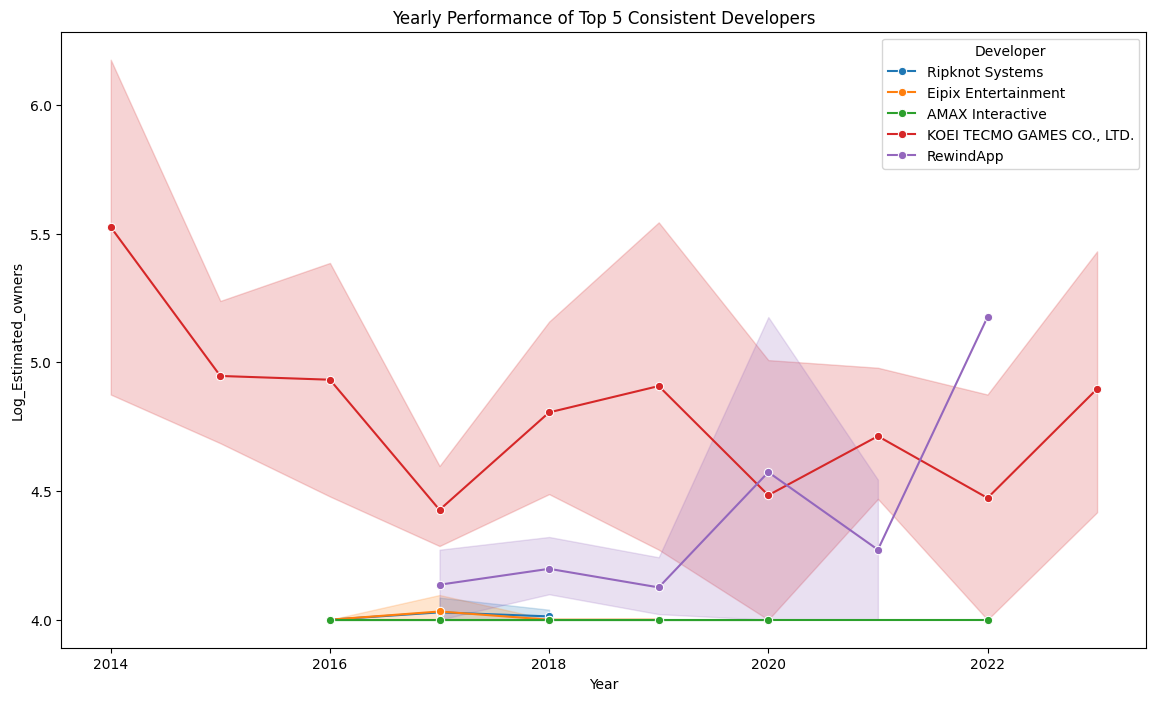

In [ ]:
# Plotting the track record of top 5 developers
plt.figure(figsize=(14, 8))
for developer in top_5_consistent_developers:
    developer_data = consistent_devs_df[consistent_devs_df['Developers'] == developer]
    sns.lineplot(x='Release_year', y='Log_Estimated_owners', data=developer_data, marker='o', label=developer)
plt.title('Yearly Performance of Top 5 Consistent Developers')
plt.xlabel('Year')
plt.ylabel('Log_Estimated_owners')
plt.legend(title='Developer')
plt.show()

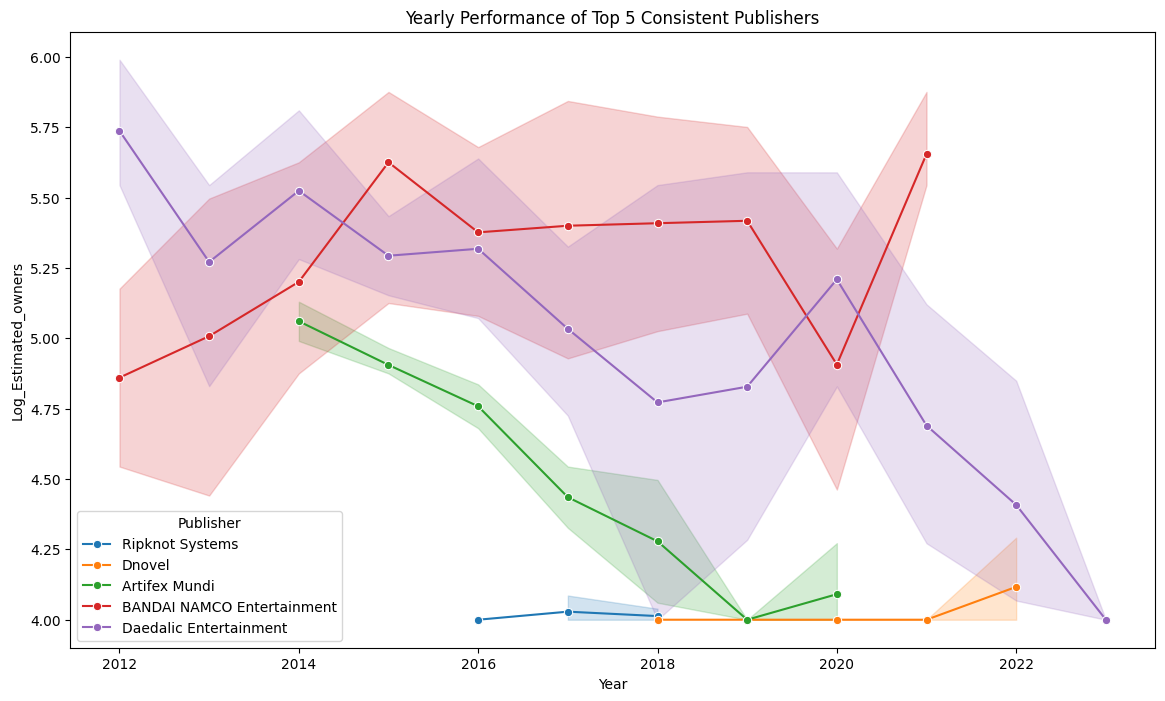

In [ ]:
# Plotting the track record of top 5 publishers
plt.figure(figsize=(14, 8))
for publisher in top_5_consistent_publishers:
    publisher_data = consistent_pubs_df[consistent_pubs_df['Publishers'] == publisher]
    sns.lineplot(x='Release_year', y='Log_Estimated_owners', data=publisher_data, marker='o', label=publisher)
plt.title('Yearly Performance of Top 5 Consistent Publishers')
plt.xlabel('Year')
plt.ylabel('Log_Estimated_owners')
plt.legend(title='Publisher')
plt.show()

**Top Performing**:

- Developers:
  * Maya Games
  * NEKOPURU,ジーメン
  * R I MAD

- Publishers:
  * Maya Games
  * Remtairy,Kagura Games
  * Outlawed Games,Ecchi Empire

**CONSISTENTLY Top Performing**:

- Developers:
  * Ripknot Systems
  * Eipix Entertainment
  * AMAX Interactive
  * KOEI TECMO GAMES CO., LTD.
  * RewindApp

- Publishers:
  * Ripknot Systems
  * Dnovel
  * Artifex Mundi
  * BANDAI NAMCO Entertainment
  * Daedalic Entertainment


## Summary

**Preprocessing:**

* Spaces in column names have been replace by `_` underscore character for convenience.

* Primary analysis involves using .info(), .describe(), .isna() etc.

* To visualize missing values, martix plots have been used. Correlation heatmap has been plotted to check for relationships within missing values. Strategies for handling missing values depend upon the percentage of missing values in the column and include imputation and column deletion

* The `Estimated_owners` column is a string of a range of values. It has been converted to a numeric mean of the range for analysis.

* `total_rating` column has been created using SteamDB's rating algorithm and is defined as:

    Total Reviews = Positive Reviews + Negative Reviews
    
    Review Score = Positive Reviews / Total Reviews
    
    Rating = Review Score - (Review Score - 0.5)*2^-log_10(Total Reviews + 1)

* `Release_year` has been extracted from the `Release_date` using a user-defined function which leverages a parser to handle the various date formats.

---



**Platform Analysis:**

  * Metrics considered are: `Peak_CCU`, `Average_playtime_forever`, `Median_playtime_forever`, `Average_playtime_two_weeks`, `Median_playtime_two_weeks`.

  * Since games can support singular or multiple platforms, performance across platforms has been analyzed by considering individual platforms as well as their possible combinations.

  * Games supporting both **Mac and Linux** have the highest performance metric values across all supporting platforms.


---


**Genre Analysis:**
  * Metrics considered are:`Genres`, `User_score`, `Metacritic_score`, `Peak_CCU`, `Estimated_owners`, `Recommendations`.

  * A new feature called `genre_popularity` has been engineered, which is a score to each genre group based on the above metrics. Main assumption is that all given metrics are equally important in determining the popularity of a genre group.

  * Games can belong to a single genre or many genres. Thus, top 10 performing genre groups have been identified. Using these genre groups, the top 10 solo genre groups have been identified as follows: **Casual, Indie, Animation & Modeling, Design & Illustration, Photo Editing, Utilities, Action, Adventure, Free to Play, Massively Multiplayer, Sports, RPG, Simulation, Strategy, Early Access.**


---



**Monetization Analysis:**

  * Metrics considered are: `Estimated_owners`, `Price`, `total_rating`, `User_score`.

  * The relationships between `total_rating` and `Estimated_owners`/`Price`/`User_Score` denote **positive correlations**.

  * It is observed that games belonging to the most popular genres are usually priced **below 20 to 30 USD**. Almost all of the games are priced **below 200 USD**.


---




**Regional Analysis:**

  * Metrics considered are: `Supported_languages`, `Full_audio_languages`, `Estimated_owners`, `Average_playtime_forever`, `User_score`, `total_rating`.

  * While we do not have specific columns corresponding to region (such as Country, City etc.), we can use the columns `Supported_languages` and `Full_audio_languages` under the assumption that performance of a game in a region can be assessed based on the language options and audio support of the game.
  
  * The most popular supported languages are **English, German, French, Spanish - Spain, Simplified Chinese, Russian, Japanese, Italian, Korean, Portuguese - Brazil**.

  * For many of the games, full audio languages are not available. By examining the others, the most popular full audio languages are: **English, Russian, German, Japanese, Simplified Chinese, French, Spanish - Spain, Traditional Chinese, Italian**. With the exception of Traditional Chinese, the most popular full audio languages are also the most popular supported languages.

---


**Release Timing Analysis:**

  * Metrics considered are: `Release_date`, `User_score`, `Peak_CCU`, `Estimated_owners`. Feature engineering is done to create meaningful columns such as `Release_month`, `Release_week`, `Release_day` and `Log_Estimated_owners` which would further help in determining a suitable release timing.

  * Standardization using StandardScaler() has been done to ensure that the differing scales of values do not affect the outcome of the analysis.

  * The months **October, Feb, April, March, November** can be positively considered to determine the time of release. Months **January, December** can be avoided while planning the release.

  * The days **Mondays, Tuesdays and Thursdays** can be chosen while deciding the time of release. **Saturdays, Sundays**, are the least desirable choice due to consistently low observed values.


---

**Developer and Publisher Analysis:**

  * Metrics considered are: `User_score`, `Metacritic_score`, `Peak_CCU`, `Log_Estimated_owners`, `total_rating`.

  * To assess the impact of outliers, the mean as well as median values of metrics have been computed. On comparison, it is observed that the mean and median values are similar. Thus, it is likely that the distribution of the data is symmetric and does not have high skewness.

  * If the mean user score is considered as a measure of performance for Developers and Publishers:
    * Top 3 Developers: Maya Games, NEKOPURU, R I MAD
    * Top 3 Publishers: Maya Games, Remtairy, Kagura Games, Outlawed Games, Ecchi Empire

  * However, simply having high user scores is not sufficient as the Developer and Publisher must be **consistently** successful. To accomplish this, we need to ensure they have released multiple games (minimum threshold = 50) and maintained high performance across those releases.

  * A `Consistency_Score` is defined to quantify the consistency in terms of CV (Coefficient of Variation) scores. A lower CV value indicates high consistency. Using the consistency score as a measure of performance for Developers and Publishers:
    * Top 5 Developers: **Ripknot Systems, Eipix Entertainment, AMAX Interactive, KOEI TECMO GAMES CO., LTD., RewindApp**
    * Top 5 Publishers: **Ripknot Systems, Dnovel, Artifex Mundi, BANDAI NAMCO Entertainment, Daedalic Entertainment**




